# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

Practico Aprendizaje No Supervisado<br>
**Grupo N° 2**

Integrantes:

Conrrero Agustina<br>
Hayas Laura<br>
Legaspi Ana<br>
Luna Andrés




**CONSIGNAS:**

1. Juntar datos etiquetados con no etiquetados. Eliminar la etiqueta.
Vamos a volver a unir los datos no etiquetados con el resto. (tengan a mano la columna de eitiquetas por si necesitan colorear algun grafico o hacer testigos)

2. Entrenar modelos de ANS
Estamos buscando algun patron que nos determine si el paciente esta en estado pre-ictal o inter-ictal. Pero ademas estamos buscando otros patrones que podrían ayudarnos a determinar esto.

Cuando prueben los distintos metodos, asegurense de hacerlo sobre los datos no etiquetados y tambien los etiquetados. Comparen los valores de las etiquetas con respecto a los clusters encontrados. Prueben con distintos numeros de clusters y vean si algun grupo coincide con el grupo de etiquetados en 1 que es el que mas nos intereso recuperar en el practico de supervisado.

2.0 - Filtro de outliers v2.0
Prueben el detector de anomalias de sklearn sobre nuestros datos. Comparenlo con las detecciones realizadas en la etapa de analisis

2.1 - Clustering
Exploren los metodos de clusters que ofrece sklearn y elijan minimo 2 para aplicar a nuestro dataset. Justifiquen la eleccion. Se pueden hacer conclusiones sobre los resultados?

2.2 - Manifolds
Nuestro dataset no tiene una dimensionalidad muy alta, sin embargo los embeddings nos pueden proporcionar informacion visual valiosa, similar a la visualizacion de los componentes principales (PCA). Prueben al menos uno de los manifolds que ofrece sklearn para visualizar nuestros datos en 2 o 3 dimensiones.

3. Volvamos a AA
Los analisis hechos en esta etapa sirven para enriquecer nuestro conocimiento sobre nuestros datos. Con esta informacion nueva, quizas podremos incrementar algunos puntos mas las predicciones del practico anterior.

Pueden usar los clusters encontrados en el punto dos como una columna nueva y usarla para entrenar los modelos. Pueden usar el filtro de outliers de sklearn si consideran que mejora la deteccion.

Mejoran los resultados? Se pueden sacar conclusiones?

4. Cuantificadores vs estimadores clasicos (Opcional)
Las columnas de media, varianza y skew, son realmente necesarias? o solo suman ruido? observen como se comportan los modelos cuando quitan esas columnas. Se puede sacar alguna conclusion sobre esto?



# **RESOLUCIÓN**

# Cargamos librerias e importamos los datos

In [ ]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importamos las librerías necesarias para trabajar
from google.colab import drive
import pandas as pd
from google.colab import files
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import (manifold, preprocessing, decomposition)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from pyclustertend import vat
from pyclustertend import ivat
from pyclustertend import hopkins


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:

SHARED_FOLDER_ALIAS = 'mentoria'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/data_preprocessed/'

# CREAMOS EL DATASET CON 3 PACIENTES JUNTOS CON ETIQUETAS

In [ ]:
# Importamos el dataset con los 3 pacientes, sin datos nulos 

path = DATASETS_PATH + 'all_labeled_curado.csv'
all_labeled_curado = pd.read_csv (path)
print(all_labeled_curado)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1         1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2         1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3         1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4         1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...       ...    ...       ...       ...       ...       ...       ...   
5966      3.0    0.0  0.448407  0.274937  0.418891  0.460836  0.176777   
5967      3.0    0.0  0.519529  0.283694  0.537028  0.522160  0.294764   
5968      3.0    1.0  0.532872  0.284772  0.558522  0.501966  0.298883   
5969      3.0    0.0  0.506230  0.281294  0.513469  0.417632  0.203651   
5970      3.0    1.0  0.534341  0.285007  0.561251  0.549156  0.325218   

           STE          Mean        Std      Skew  
0     0.802138  4.426225e-06  15.557899 -0.000629  
1     0

In [ ]:
# Analizamos la cantidad de registros para cada etiqueta
all_labeled_curado.groupby('State')['Patient'].count()

State
0.0    5536
1.0     435
Name: Patient, dtype: int64

In [ ]:
# Visualizamos la distribución de las etiquetas en el DF etiquetado, para ver si observamos alguna agrupación entre pares de variables
#Descomentar la siguiente linea cuando sea necesario porque tarda mucho en correr:
#sns.pairplot(all_labeled_curado, hue='State')

# CREAMOS EL DATASET CON 3 PACIENTES JUNTOS **SIN** ETIQUETAS

In [ ]:
# Importamos el dataset con los 3 pacientes, sin etiquetas
path = DATASETS_PATH + 'all_not_labeled_curado.csv'
all_not_labeled_curado = pd.read_csv (path)
print(all_not_labeled_curado)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1         1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2         1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3         1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4         1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   
...       ...       ...       ...       ...       ...       ...       ...   
6034      3.0  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
6035      3.0  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
6036      3.0  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
6037      3.0  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
6038      3.0  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

              Mean        Std      Skew  
0    -1.057214e-06  25.648324 -0.

# UNIMOS LOS DATASETS: LOS 3 PACIENTES **CON** ETIQUETAS Y **SIN** ETIQUETAS

In [ ]:
# Creamos un DF con los datos etiquetados y no etiquetados de los 3 pacientes en conjunto llamado ALL_DATA
all_data = [all_labeled_curado,all_not_labeled_curado]
all_data = pd.concat(all_data,ignore_index=True)
display(all_data)

Patient  State        PE        SC       GNE        SE       LZC  \
0          1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1          1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2          1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3          1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4          1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...        ...    ...       ...       ...       ...       ...       ...   
12005      3.0    NaN  0.516479  0.282887  0.531147  0.464275  0.250580   
12006      3.0    NaN  0.487934  0.279556  0.483639  0.444114  0.207290   
12007      3.0    NaN  0.529587  0.283785  0.552341  0.490122  0.269728   
12008      3.0    NaN  0.493372  0.280451  0.493013  0.443925  0.209394   
12009      3.0    NaN  0.483616  0.278193  0.475671  0.416879  0.187882   

            STE          Mean        Std      Skew  
0      0.802138  4.426225e-06  15.557899 -0.000629  
1      0.752879  2.075434e-05  48.467869 -0.031036  
2      0.754335  5.322688e-06  46.771531 -0.077559  
3      0.747854 -1.353617e-05  48.590217 -0.024175  
4      0.668147 -5.555946e-07  41.749673 -0.087401  
...         ...           ...        ...       ...  
12005  0.732868  1.182837e-05  35.717262  0.028871  
12006  0.708959  5.198219e-05  63.084220 -0.028295  
12007  0.744144 -8.128566e-06  30.744780  0.004287  
12008  0.713554  3.173127e-05  61.687320  0.019371  
12009  0.705065 -5.368015e-05  69.037631  0.042493  

[12010 rows x 11 columns]

A continuación, decidimos catalogar como estado=2 a aquellas entradas sin etiquetar para evitar valores de tipo NA en el futuro. Por lo tanto, cada vez que aparezca el estado 2 se hace referencia a aquellos valores del dataset que no poseen etiquetas.

In [ ]:
#IMPORTANTE: las entradas sin estado fueron renombradas como State=2 para evitar registros con valores NA
all_data['State'] = all_data['State'].fillna(2)
all_data

Patient  State        PE        SC       GNE        SE       LZC  \
0          1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1          1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2          1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3          1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4          1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...        ...    ...       ...       ...       ...       ...       ...   
12005      3.0    2.0  0.516479  0.282887  0.531147  0.464275  0.250580   
12006      3.0    2.0  0.487934  0.279556  0.483639  0.444114  0.207290   
12007      3.0    2.0  0.529587  0.283785  0.552341  0.490122  0.269728   
12008      3.0    2.0  0.493372  0.280451  0.493013  0.443925  0.209394   
12009      3.0    2.0  0.483616  0.278193  0.475671  0.416879  0.187882   

            STE          Mean        Std      Skew  
0      0.802138  4.426225e-06  15.557899 -0.000629  
1      0.752879  2.075434e-05  48.467869 -0.031036  
2      0.754335  5.322688e-06  46.771531 -0.077559  
3      0.747854 -1.353617e-05  48.590217 -0.024175  
4      0.668147 -5.555946e-07  41.749673 -0.087401  
...         ...           ...        ...       ...  
12005  0.732868  1.182837e-05  35.717262  0.028871  
12006  0.708959  5.198219e-05  63.084220 -0.028295  
12007  0.744144 -8.128566e-06  30.744780  0.004287  
12008  0.713554  3.173127e-05  61.687320  0.019371  
12009  0.705065 -5.368015e-05  69.037631  0.042493  

[12010 rows x 11 columns]

In [ ]:
# Visualizamos las etiquetas en el dataframe unificado (3 pacientes con y sin etiquetas)
#Descomentar la siguiente linea cuando sea necesario porque tarda mucho en correr:
#sns.pairplot(all_data, hue='State')

In [ ]:
# Hacemos una copia del DF para trabajar sobre la copia
all_data_sin_eti = all_data.copy()

In [ ]:
# Eliminamos la columna de estado y paciente en el DF
all_data_sin_eti = all_data_sin_eti.drop(columns=['State', 'Patient'])
print(all_data_sin_eti)

             PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  
0      4.426225e-06  15.557899 -0.000629  
1      2.075434e-05  48.467869 -0.031036  
2      5.322688e-06  46.771531 -0.077559  

## Analizamos la correlación de las variables

Creemos importante analizar la correlacion de las variables en el dataset ya que una alta correlación entre dos columnas indicaría que ambas estarían aportando información similar. Si dos variables estan muy correlacionadas, resulta irrelevante e incluso contraproductorio, ya que la misma información (o muy similar) tendrá duplicado su peso al estar dos veces.

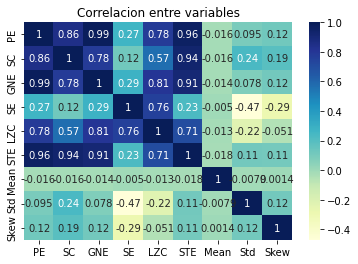

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(all_data_sin_eti.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlacion entre variables")
plt.show()


Del análisis visual de la matriz de correlación, se concluye que podríamos eliminar la variable STE, que esta presenta mayor correlación con el resto de las varibles, analizando cada una por separado. De todas maneras, al no conocer en profundidad la importancia de cada una de las variables (falta de conocimiento de dominio) decidimos no eliminarla. 

### Analis de correlacion entre variables: analisis de variables por separado

Para continuar con el analisis exploratorio, decidimos analizar cada variable por separado.

In [ ]:
all_data_sin_STE = all_data_sin_eti.copy()

In [ ]:
all_data_sin_STE = all_data_sin_STE.drop(columns=['STE'])
all_data_sin_STE.head(3)

PE        SC       GNE        SE       LZC      Mean        Std  \
0  0.598255  0.285388  0.662095  0.520937  0.325380  0.000004  15.557899   
1  0.541613  0.283209  0.570060  0.413078  0.195333  0.000021  48.467869   
2  0.543293  0.283316  0.572859  0.418008  0.199974  0.000005  46.771531   

       Skew  
0 -0.000629  
1 -0.031036  
2 -0.077559

In [ ]:
all_data_sin_STE.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'Mean', 'Std', 'Skew'], dtype='object')

In [ ]:
feature_names = ['PE', 'SC', 'GNE', 'SE', 'LZC', 'Mean', 'Std', 'Skew']

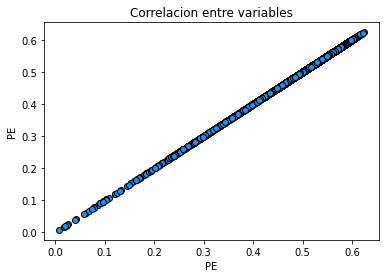

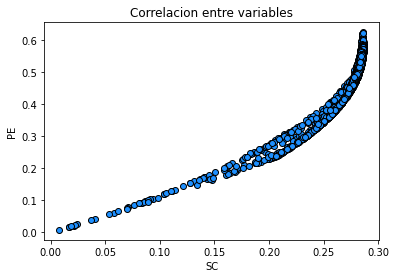

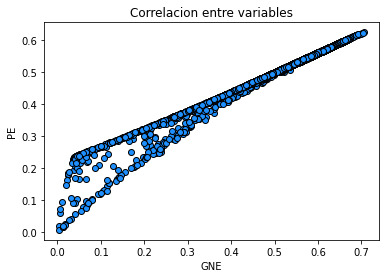

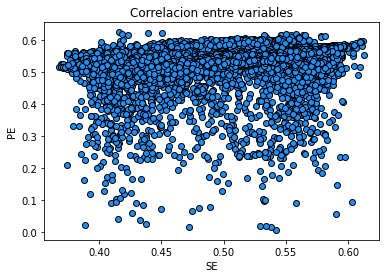

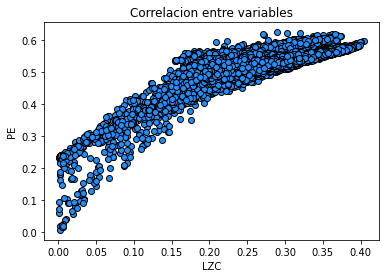

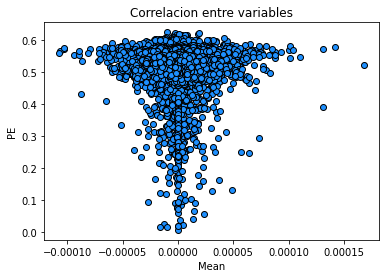

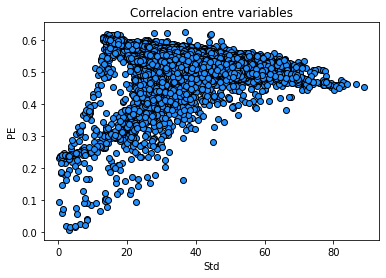

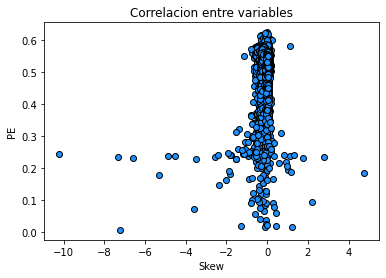

In [ ]:
for feature in feature_names:
    plt.figure()
    plt.scatter(all_data_sin_STE[feature], all_data_sin_STE.PE, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title("Correlacion entre variables")
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.show()

## Estandarizamos los datos con MinMaxScaler

Es muy importante para cualquier método no supervisado que los datos estén escalados. Si bien la mayoría de nuestras variables están entre 0 y 1, decidimos escalar todo el dataset utilizando MinMaxScaler(). Este estimador escala y traduce cada feature individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, en este caso, entre cero y uno.

In [ ]:
col_names = ['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew']

In [ ]:
all_data_sin_eti_minmax = all_data_sin_eti.copy()
all_data_sin_eti_minmax = all_data_sin_eti_minmax[col_names]

In [ ]:
min_max = MinMaxScaler()
all_data_sin_eti_minmax = min_max.fit_transform(all_data_sin_eti_minmax)
all_data_sin_eti_minmax

array([[0.95906635, 0.99526342, 0.9386135 , ..., 0.40605743, 0.17173869,
        0.68303985],
       [0.86703953, 0.98745231, 0.80731574, ..., 0.46535519, 0.54397283,
        0.68100512],
       [0.86976948, 0.98783354, 0.8113083 , ..., 0.40931306, 0.52478609,
        0.67789199],
       ...,
       [0.84750097, 0.98951769, 0.78203639, ..., 0.36046299, 0.34351264,
        0.68336878],
       [0.7886621 , 0.97756082, 0.69739959, ..., 0.50521942, 0.6934938 ,
        0.68437819],
       [0.77281125, 0.96946411, 0.67265904, ..., 0.19503621, 0.77663081,
        0.68592539]])

In [ ]:
# Tranformamos la matriz en un DF
all_data_sin_eti_minmax = pd.DataFrame(all_data_sin_eti_minmax, columns= col_names)

In [ ]:
#Descomentar cuando sea necesario porque tarda mucho en correr:
#sns.pairplot(all_data_sin_eti_minmax)

##Estandarizamos los datos con StandardScaler

A su vez, estandarizamos los datos con otro estimador: StandarScaler. Este ultimo trabaja de manera diferente: transforma los datos de manera que su distribución tiene un valor medio 0 y una desviación estándar de 1. StandarScaler se utiliza principalmente cuando se tienen datos con distribución normal. Debido a que este no es nuestro caso, utilizamos principalmente los datos escalados con MinMax y compararemos solamente en algunos casos los resultados utilizando el escalador StandarScaler.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
all_data_sin_eti_stdscaler = all_data_sin_eti.copy()
all_data_sin_eti_stdscaler = all_data_sin_eti_stdscaler[col_names]

In [ ]:
stdscaler = StandardScaler()
all_data_sin_eti_stdscaler = stdscaler.fit_transform(all_data_sin_eti_stdscaler)
all_data_sin_eti_stdscaler

array([[ 1.22198949,  0.28241757,  1.27356064, ...,  0.28202403,
        -1.91777388,  0.36789964],
       [ 0.28115516,  0.15044349,  0.26983051, ...,  1.2877273 ,
         0.98547984,  0.23618846],
       [ 0.30906479,  0.1568845 ,  0.30035232, ...,  0.33724018,
         0.8358322 ,  0.03467127],
       ...,
       [ 0.08140307,  0.18533945,  0.07657779, ..., -0.49126787,
        -0.57801673,  0.38919174],
       [-0.52013486, -0.0166802 , -0.57044402, ...,  1.96383344,
         2.15167412,  0.45453198],
       [-0.68218572, -0.15347984, -0.75957777, ..., -3.2969431 ,
         2.80010428,  0.55468443]])

In [ ]:
# Tranformamos la matriz en un DF
all_data_sin_eti_stdscaler = pd.DataFrame(all_data_sin_eti_stdscaler, columns= col_names)
all_data_sin_eti_stdscaler

PE        SC       GNE        SE       LZC       STE      Mean  \
0      1.221989  0.282418  1.273561  0.401547  0.765218  1.011285  0.282024   
1      0.281155  0.150443  0.269831 -1.328654 -0.983320  0.230577  1.287727   
2      0.309065  0.156884  0.300352 -1.249572 -0.920928  0.253640  0.337240   
3      0.187081  0.121012  0.167503 -1.679505 -1.373566  0.150930 -0.824340   
4     -1.456811 -0.511581 -1.597237 -1.332864 -2.049489 -1.112382 -0.024823   
...         ...       ...       ...       ...       ...       ...       ...   
12005 -0.136316  0.130881 -0.154560 -0.507388 -0.240499 -0.086599  0.737947   
12006 -0.610460 -0.070932 -0.672684 -0.830786 -0.822552 -0.465528  3.211156   
12007  0.081403  0.185339  0.076578 -0.092771  0.016953  0.092118 -0.491268   
12008 -0.520135 -0.016680 -0.570444 -0.833832 -0.794266 -0.392713  1.963833   
12009 -0.682186 -0.153480 -0.759578 -1.267678 -1.083510 -0.527248 -3.296943   

            Std      Skew  
0     -1.917774  0.367900  
1      0.985480  0.236188  
2      0.835832  0.034671  
3      0.996273  0.265909  
4      0.392814 -0.007958  
...         ...       ...  
12005 -0.139354  0.495681  
12006  2.274906  0.248063  
12007 -0.578017  0.389192  
12008  2.151674  0.454532  
12009  2.800104  0.554684  

[12010 rows x 9 columns]

In [ ]:
#Descomentar cuando sea necesario porque tarda mucho en correr:
#sns.pairplot(all_data_sin_eti_stdscaler)

## Analizamos los datos con TSNE

Luego de tener nuestro dataset listo, decidimos aplicar una reduccion de dimensionalidad con tSNE a los datos escalados con MinMax. Aquí, el objetivo es encontrar agrupaciones de datos independientemente de su naturaleza.

In [ ]:
# Importamos la librería y convertimos el DF en array

from sklearn.manifold import TSNE
arr = all_data_sin_eti_minmax.to_numpy()

In [ ]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15)
df_tsne = arr
X_tsne_all = tsne.fit_transform(arr)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12010 samples in 0.021s...
[t-SNE] Computed neighbors for 12010 samples in 1.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12010
[t-SNE] Computed conditional probabilities for sample 2000 / 12010
[t-SNE] Computed conditional probabilities for sample 3000 / 12010
[t-SNE] Computed conditional probabilities for sample 4000 / 12010
[t-SNE] Computed conditional probabilities for sample 5000 / 12010
[t-SNE] Computed conditional probabilities for sample 6000 / 12010
[t-SNE] Computed conditional probabilities for sample 7000 / 12010
[t-SNE] Computed conditional probabilities for sample 8000 / 12010
[t-SNE] Computed conditional probabilities for sample 9000 / 12010
[t-SNE] Computed conditional probabilities for sample 10000 / 12010
[t-SNE] Computed conditional probabilities for sample 11000 / 12010
[t-SNE] Computed conditional probabilities for sample 12000 / 12010
[t-SNE] Computed conditional probabilities for sam

In [ ]:
X_tsne_all.shape

(12010, 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



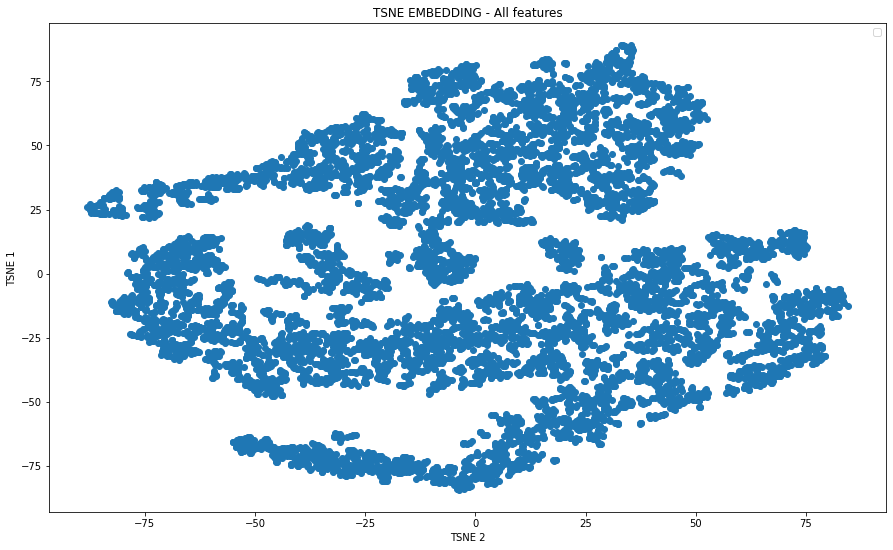

In [ ]:
# Plot de resultado de tSNE en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles)

En la visualización anterior se pueden observar ciertas agrupaciones, sin embargo, al tratarse de ejes de reducción de dimensionalidad, no podemos atribuirles clases a los clústeres formados. De todas maneras, en principio no podemos observar la presencia de 2 clusters facilmente identificables.

# Analizamos los clústeres con K-MEANS

El primer método de clustering que decidimos probar es Kmeans debido a su amplia fama y fácil utilización. Como se mencionó anteriormente, se utiliza el dataframe con los datos escalados por MinMax. 

La desventaja de Kmeans es que uno debe seleccionar el número de clusters. Comenzamos con un número de clusters n_clust = 2, esperando encontrar una segmentación de los datos en estado 0 y estado 1 y tambien un n_clust=6, esperando que el algoritmo clusterice por paciente y por estado.

##K-means con 2 clusters (MinMax)

In [ ]:
# Probamos con 2 clústeres, para evaluar si clusteriza por estados 
n_clust = 2

km = KMeans(n_clusters=n_clust)
km.fit(all_data_sin_eti_minmax)


KMeans(n_clusters=2)

In [ ]:
# Etiquetas asignadas por el algoritmo
clusters = km.labels_

In [ ]:
df_clusters=all_data_sin_eti.copy()
df_clusters['kmeans_2'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


PE        SC       GNE        SE       LZC       STE      Mean  \
0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138  0.000004   
1  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879  0.000021   
2  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335  0.000005   
3  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854 -0.000014   

         Std      Skew  kmeans_2  
0  15.557899 -0.000629         0  
1  48.467869 -0.031036         1  
2  46.771531 -0.077559         1  
3  48.590217 -0.024175         1

### PCA sobre DF (MinMax) con clústeres

Se utiliza PCA en esta y otras instancias como una herramienta de visualización para poder ver mejor a los clústeres que encontró el algoritmo ya que resulta dificil verlo en todas las dimensiones al mismo tiempo. 

In [ ]:
pca2 = PCA(n_components=2)
componentes = pca2.fit_transform(all_data_sin_eti_minmax)
componentes.shape

(12010, 2)

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 2 componentes principales.
pca2.explained_variance_ratio_.sum()*100

89.08359166870106

In [ ]:
df_PCA = pd.DataFrame(componentes[:, :2], columns = ['PCA1',
'PCA2'])

In [ ]:
df_PCA_kmeans = [df_clusters,df_PCA]
df_PCA_kmeans = pd.concat(df_PCA_kmeans, axis=1)
display(df_PCA_kmeans)


PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_2      PCA1      PCA2  
0      4.426225e-06  15.557899 -0.000629         0 -0.269388 -0.056360  
1      2.075434e-05  48.467869 -0.031036         1  0.352992 -0.195801  
2      5.322688e-06  46.771531 -0.077559         1  0.326777 -0.186016  
3     -1.353617e-05  48.590217 -0.024175         1  0.464839 -0.207400  
4     -5.555946e-07  41.749673 -0.087401         1  0.561671  0.116558  
...             ...        ...       ...       ...       ...       ...  
12005  1.182837e-05  35.717262  0.028871         1  0.125326 -0.027249  
12006  5.198219e-05  63.084220 -0.028295         1  0.325671 -0.088520  
12007 -8.128566e-06  30.744780  0.004287         0 -0.001877  0.002479  
12008  3.173127e-05  61.687320  0.019371         1  0.314644 -0.097502  
12009 -5.368015e-05  69.037631  0.042493         1  0.449711 -0.144649  

[12010 rows x 12 columns]

[Text(0.5, 1.0, 'Clusters de kmeans sobre embedding PCA')]

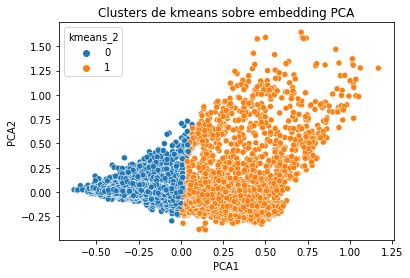

In [ ]:
sns.scatterplot(data=df_PCA_kmeans, x='PCA1', y='PCA2', hue="kmeans_2").set(title='Clusters de kmeans sobre embedding PCA')

In [ ]:
#Descomentar cuando sea necesario porque tarda mucho
#sns.pairplot(df_PCA_kmeans, hue='kmeans_2')

A simple vista, k means logró separar los datos en dos clusters de manera lineal. A continuación, interpretamos qué significa cada cluster.

### Incorporamos las columnas State y Patient

In [ ]:
all_data_clusters = [df_PCA_kmeans,all_data[['State','Patient']]]
all_data_clusters = pd.concat(all_data_clusters, axis=1)
display(all_data_clusters)


PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_2      PCA1      PCA2  State  \
0      4.426225e-06  15.557899 -0.000629         0 -0.269388 -0.056360    1.0   
1      2.075434e-05  48.467869 -0.031036         1  0.352992 -0.195801    0.0   
2      5.322688e-06  46.771531 -0.077559         1  0.326777 -0.186016    0.0   
3     -1.353617e-05  48.590217 -0.024175         1  0.464839 -0.207400    0.0   
4     -5.555946e-07  41.749673 -0.087401         1  0.561671  0.116558    0.0   
...             ...        ...       ...       ...       ...       ...    ...   
12005  1.182837e-05  35.717262  0.028871         1  0.125326 -0.027249    2.0   
12006  5.198219e-05  63.084220 -0.028295         1  0.325671 -0.088520    2.0   
12007 -8.128566e-06  30.744780  0.004287         0 -0.001877  0.002479    2.0   
12008  3.173127e-05  61.687320  0.019371         1  0.314644 -0.097502    2.0   
12009 -5.368015e-05  69.037631  0.042493         1  0.449711 -0.144649    2.0   

       Patient  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
...        ...  
12005      3.0  
12006      3.0  
12007      3.0  
12008      3.0  
12009      3.0  

[12010 rows x 14 columns]

[Text(0.5, 1.0, 'Distribución de estados en clusters de kmeans sobre embedding PCA')]

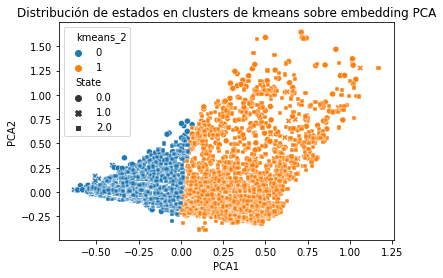

In [ ]:
#Visualizamos la distribución del estado con diferentes formas:
sns.scatterplot(data=all_data_clusters, x='PCA1', y='PCA2', hue="kmeans_2", style = 'State').set(title='Distribución de estados en clusters de kmeans sobre embedding PCA')

[Text(0.5, 1.0, 'Distribución de pacientes en clusters de kmeans sobre embedding PCA')]

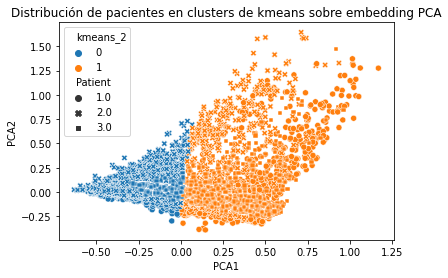

In [ ]:
##Visualizamos la distribución de los pacientes con diferentes formas:
sns.scatterplot(data=all_data_clusters, x='PCA1', y='PCA2', hue="kmeans_2", style = 'Patient').set(title='Distribución de pacientes en clusters de kmeans sobre embedding PCA')

Para ver si los clusters pudieron separar por estado y/o por paciente, se evalua el count de cada estado (recordar que estado=2 significa sin etiquetar) y de cada paciente en cada cluster.

In [ ]:
# Separamos los datos etiquetados por cluster para ver cuántos datos de cada paciente y cada estado posee cada cluster
cluster_0 = all_data_clusters[all_data_clusters['kmeans_2'] == 0]
cluster_1 = all_data_clusters[all_data_clusters['kmeans_2'] == 1]

In [ ]:
cluster_0['State'].value_counts()


2.0    3014
0.0    2878
1.0     291
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

2.0    3025
0.0    2658
1.0     144
Name: State, dtype: int64

Los clusteres de kmeans no separaron bien el estado ya que cada cluster posee cantidad similar de cada estado.

In [ ]:
cluster_0['Patient'].value_counts()


2.0    3998
3.0    1412
1.0     773
Name: Patient, dtype: int64

In [ ]:
cluster_1['Patient'].value_counts()

3.0    3254
1.0    2031
2.0     542
Name: Patient, dtype: int64

Los clusteres de kmeans no separaron bien el paciente ya que cada cluster posee cantidad similar de cada estado.

Por lo tanto, tanto en las visualizaciones como en estas últimas cuatro tablas, se puede observar que los clústeres de kmeans no separan correctamente por estado ni por paciente. En otras palabras, ambos clusters poseen información de todos los estados y pacientes y no se observa una clara distinción entre ellos.

##K-Means 2 clusteres (StandardScaler)

Como se mencionó anteriormente, los datos fueron escalados utilizando dos métodos: MinMax y StandarScaler. En esta ocasión, probamos la herramienta de clusterización K-means (de la misma manera que antes) sobre el dataset escalado con StandarScaler para encontrar 2 clusters.

In [ ]:
# Probamos con 2 clústeres, para evaluar si clusteriza por estados 
n_clust = 2

km = KMeans(n_clusters=n_clust)
km.fit(all_data_sin_eti_stdscaler)

KMeans(n_clusters=2)

In [ ]:
# Etiquetas asignadas por el algoritmo
clusters_std = km.labels_

In [ ]:
df_clusters_std=all_data_sin_eti.copy()
df_clusters_std['kmeans_2'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters_std.head(4)

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


PE        SC       GNE        SE       LZC       STE      Mean  \
0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138  0.000004   
1  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879  0.000021   
2  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335  0.000005   
3  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854 -0.000014   

         Std      Skew  kmeans_2  
0  15.557899 -0.000629         0  
1  48.467869 -0.031036         0  
2  46.771531 -0.077559         0  
3  48.590217 -0.024175         0

###PCA sobre DF (StandardsScaler) con clústeres

In [ ]:
#pca3 calcula PCA con la data escalada con StandardScaler
pca3 = PCA(n_components=2)
componentes = pca3.fit_transform(all_data_sin_eti_stdscaler)
componentes.shape

(12010, 2)

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 2 componentes principales.
pca3.explained_variance_ratio_.sum()*100

70.5980891757267

In [ ]:
df_PCA3 = pd.DataFrame(componentes[:, :2], columns = ['PCA11',
'PCA22'])

In [ ]:
df_PCA3_kmeans = [df_clusters_std,df_PCA3]
df_PCA3_kmeans = pd.concat(df_PCA3_kmeans, axis=1)
display(df_PCA3_kmeans)

PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_2     PCA11     PCA22  
0      4.426225e-06  15.557899 -0.000629         0 -2.092116  1.037053  
1      2.075434e-05  48.467869 -0.031036         0  0.235828 -1.841854  
2      5.322688e-06  46.771531 -0.077559         0  0.156970 -1.627546  
3     -1.353617e-05  48.590217 -0.024175         0  0.580176 -2.171663  
4     -5.555946e-07  41.749673 -0.087401         0  3.204236 -1.167456  
...             ...        ...       ...       ...       ...       ...  
12005  1.182837e-05  35.717262  0.028871         0  0.303455 -0.485818  
12006  5.198219e-05  63.084220 -0.028295         0  1.314286 -1.937120  
12007 -8.128566e-06  30.744780  0.004287         0 -0.193374  0.054588  
12008  3.173127e-05  61.687320  0.019371         0  1.139838 -1.984073  
12009 -5.368015e-05  69.037631  0.042493         0  1.555158 -2.693876  

[12010 rows x 12 columns]

In [ ]:
#Descomentar cuando sea necesario porque tarda mucho
#sns.pairplot(df_PCA3_kmeans, hue='kmeans_2', palette = "YlOrBr")

[Text(0.5, 1.0, 'Distribución de estados en clusters de kmeans sobre embedding PCA')]

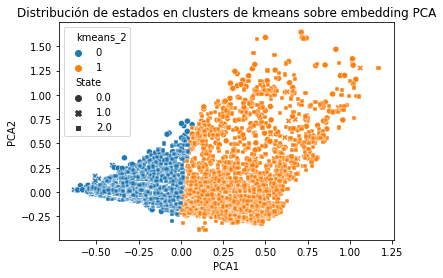

In [ ]:
sns.scatterplot(data=all_data_clusters, x='PCA1', y='PCA2', hue="kmeans_2", style = 'State').set(title='Distribución de estados en clusters de kmeans sobre embedding PCA')

[Text(0.5, 1.0, 'Distribución de pacientes en clusters de kmeans sobre embedding PCA')]

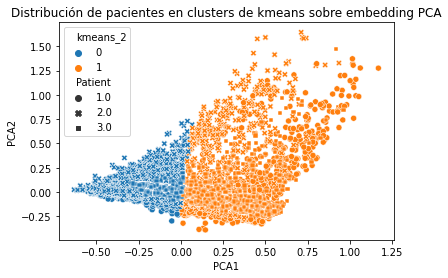

In [ ]:
sns.scatterplot(data=all_data_clusters, x='PCA1', y='PCA2', hue="kmeans_2", style = 'Patient').set(title='Distribución de pacientes en clusters de kmeans sobre embedding PCA')

In [ ]:
all_data_clusters.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew',
       'kmeans_2', 'PCA1', 'PCA2', 'State', 'Patient'],
      dtype='object')

In [ ]:
# Separamos los datos etiquetados por cluster
cluster_0 = all_data_clusters[all_data_clusters['kmeans_2'] == 0]
cluster_1 = all_data_clusters[all_data_clusters['kmeans_2'] == 1]

In [ ]:
cluster_0.shape

(6183, 14)

In [ ]:
cluster_1.shape

(5827, 14)

In [ ]:
cluster_0['State'].value_counts()

2.0    3014
0.0    2878
1.0     291
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

2.0    3025
0.0    2658
1.0     144
Name: State, dtype: int64

In [ ]:
cluster_0['Patient'].value_counts()

2.0    3998
3.0    1412
1.0     773
Name: Patient, dtype: int64

In [ ]:
cluster_1['Patient'].value_counts()

3.0    3254
1.0    2031
2.0     542
Name: Patient, dtype: int64

Se puede observar claramente que los clusters resultantes de k-means_2 no separaron eficientemente el estado 0 del estado 1 ni tampoco entre pacientes para los datos escalados con StandarScaler ni con MinMax. 

Debido a la heterogeneidad de los datos de cada paciente, no nos sorprendió este resultado. Por el mismo motivo, intentamos probar con un n_clust=6. 

##K-means con 6 clusters

Se prueban 6 clusters para ver si el modelo permite separar en estado y paciente al mismo tiempo. En otras palabras, buscamos encontrar 6 clusters en donde cluster1 sea igual a paciente1-estado1, cluster2 igual a paciente1-estado2, etcétera.

In [ ]:
# Probamos con 6 clústeres, para evaluar si clusteriza por estados y por paciente
n_clust = 6

km = KMeans(n_clusters=n_clust)
km.fit(all_data_sin_eti_minmax)


KMeans(n_clusters=6)

In [ ]:
# Etiquetas asignadas por el algoritmo
clusters = km.labels_

In [ ]:
df_clusters=all_data_sin_eti.copy()
df_clusters['kmeans_6'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  6 clusters, nosotros forzamos la cantidad


PE        SC       GNE        SE       LZC       STE      Mean  \
0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138  0.000004   
1  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879  0.000021   
2  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335  0.000005   
3  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854 -0.000014   

         Std      Skew  kmeans_6  
0  15.557899 -0.000629         2  
1  48.467869 -0.031036         3  
2  46.771531 -0.077559         3  
3  48.590217 -0.024175         3

In [ ]:
df_PCA_kmeans = [df_clusters,df_PCA]
df_PCA_kmeans = pd.concat(df_PCA_kmeans, axis=1)
display(df_PCA_kmeans)


PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_6      PCA1      PCA2  
0      4.426225e-06  15.557899 -0.000629         2 -0.269388 -0.056360  
1      2.075434e-05  48.467869 -0.031036         3  0.352992 -0.195801  
2      5.322688e-06  46.771531 -0.077559         3  0.326777 -0.186016  
3     -1.353617e-05  48.590217 -0.024175         3  0.464839 -0.207400  
4     -5.555946e-07  41.749673 -0.087401         3  0.561671  0.116558  
...             ...        ...       ...       ...       ...       ...  
12005  1.182837e-05  35.717262  0.028871         4  0.125326 -0.027249  
12006  5.198219e-05  63.084220 -0.028295         3  0.325671 -0.088520  
12007 -8.128566e-06  30.744780  0.004287         4 -0.001877  0.002479  
12008  3.173127e-05  61.687320  0.019371         3  0.314644 -0.097502  
12009 -5.368015e-05  69.037631  0.042493         3  0.449711 -0.144649  

[12010 rows x 12 columns]

[Text(0.5, 1.0, 'Clusters de kmeans sobre embedding PCA')]

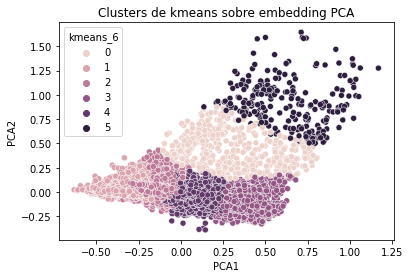

In [ ]:
#Ploteamos los clusters de kmeans sobre los resultados de PCA
sns.scatterplot(data=df_PCA_kmeans, x='PCA1', y='PCA2', hue="kmeans_6").set(title='Clusters de kmeans sobre embedding PCA')

A simple vista, el algoritmo de kmeans encontró 6 clusters en el dataset. Por el mismo motivo que el anterior, decidimos plotear los resultados sobre PCA para poder ver más de 2 dimensiones al mismo tiempo en 2D. 
A continuación, analizamos la información de cada cluster, es decir, vemos si separa bien por estado y por paciente.

In [ ]:
#Descomentar solo cuando sea necesario porque tarda mucho en correr
#sns.pairplot(df_PCA_kmeans, hue='kmeans_6')

### Incorporamos las columnas State y Patient

In [ ]:
all_data_6clusters = [df_PCA_kmeans,all_data[['State','Patient']]]
all_data_6clusters = pd.concat(all_data_6clusters, axis=1)
display(all_data_6clusters)


PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_6      PCA1      PCA2  State  \
0      4.426225e-06  15.557899 -0.000629         2 -0.269388 -0.056360    1.0   
1      2.075434e-05  48.467869 -0.031036         3  0.352992 -0.195801    0.0   
2      5.322688e-06  46.771531 -0.077559         3  0.326777 -0.186016    0.0   
3     -1.353617e-05  48.590217 -0.024175         3  0.464839 -0.207400    0.0   
4     -5.555946e-07  41.749673 -0.087401         3  0.561671  0.116558    0.0   
...             ...        ...       ...       ...       ...       ...    ...   
12005  1.182837e-05  35.717262  0.028871         4  0.125326 -0.027249    2.0   
12006  5.198219e-05  63.084220 -0.028295         3  0.325671 -0.088520    2.0   
12007 -8.128566e-06  30.744780  0.004287         4 -0.001877  0.002479    2.0   
12008  3.173127e-05  61.687320  0.019371         3  0.314644 -0.097502    2.0   
12009 -5.368015e-05  69.037631  0.042493         3  0.449711 -0.144649    2.0   

       Patient  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
...        ...  
12005      3.0  
12006      3.0  
12007      3.0  
12008      3.0  
12009      3.0  

[12010 rows x 14 columns]

[Text(0.5, 1.0, 'Distribución de estados en clusters de kmeans sobre embedding PCA')]

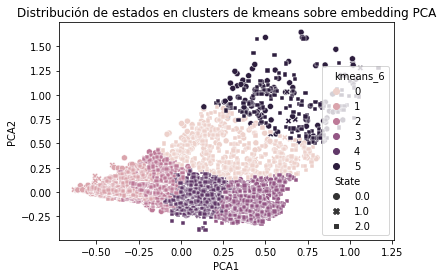

In [ ]:
sns.scatterplot(data=all_data_6clusters, x='PCA1', y='PCA2', hue="kmeans_6", style = 'State').set(title='Distribución de estados en clusters de kmeans sobre embedding PCA')

[Text(0.5, 1.0, 'Distribución de pacientes en clusters de kmeans sobre embedding PCA')]

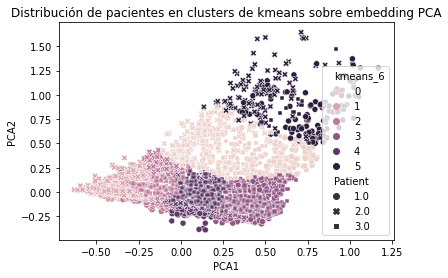

In [ ]:
sns.scatterplot(data=all_data_6clusters, x='PCA1', y='PCA2', hue="kmeans_6", style = 'Patient').set(title='Distribución de pacientes en clusters de kmeans sobre embedding PCA')

Si bien resulta complicado de visualizar, se puede ver que todos los clusters están formados por todos los pacientes y todos los estados. Esto se puede observar mejor a continuación con los counts de cada cluster: 

In [ ]:
all_data_6clusters.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew',
       'kmeans_6', 'PCA1', 'PCA2', 'State', 'Patient'],
      dtype='object')

In [ ]:
# Separamos los datos etiquetados por cluster
cluster_0 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 0]
cluster_1 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 1]
cluster_2 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 2]
cluster_3 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 3]
cluster_4 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 4]
cluster_5 = all_data_6clusters[all_data_6clusters['kmeans_6'] == 5]

In [ ]:
print(cluster_0.shape, cluster_1.shape, cluster_2.shape, cluster_3.shape, cluster_4.shape, cluster_5.shape)
#La cantidad de datos en cada cluster no es homogenea

(466, 14) (3707, 14) (2013, 14) (2980, 14) (2601, 14) (243, 14)


In [ ]:
#Por estado:

In [ ]:
cluster_0['State'].value_counts()

2.0    264
0.0    188
1.0     14
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

0.0    1796
2.0    1766
1.0     145
Name: State, dtype: int64

In [ ]:
cluster_2['State'].value_counts()

2.0    1030
0.0     853
1.0     130
Name: State, dtype: int64

In [ ]:
cluster_3['State'].value_counts()

2.0    1623
0.0    1329
1.0      28
Name: State, dtype: int64

In [ ]:
cluster_4['State'].value_counts()

0.0    1272
2.0    1218
1.0     111
Name: State, dtype: int64

In [ ]:
cluster_5['State'].value_counts()

2.0    138
0.0     98
1.0      7
Name: State, dtype: int64

In [ ]:
#Paciente:

In [ ]:
cluster_0['Patient'].value_counts()

2.0    234
1.0    153
3.0     79
Name: Patient, dtype: int64

In [ ]:
cluster_1['Patient'].value_counts()

2.0    3638
1.0      66
3.0       3
Name: Patient, dtype: int64

In [ ]:
cluster_2['Patient'].value_counts()

3.0    1200
1.0     629
2.0     184
Name: Patient, dtype: int64

In [ ]:
cluster_3['Patient'].value_counts()

3.0    1729
1.0    1219
2.0      32
Name: Patient, dtype: int64

In [ ]:
cluster_4['Patient'].value_counts()

3.0    1635
1.0     619
2.0     347
Name: Patient, dtype: int64

In [ ]:
cluster_5['Patient'].value_counts()

1.0    118
2.0    105
3.0     20
Name: Patient, dtype: int64

Los 6 clusters generados por kmeans no dividieron la data como esperabamos. Al igual que utilizando kmeans con n=2, los 6 clusters poseen información mezclada. Es decir, no pudieron separar estado ni paciente.

### Grafico de Silueta para todos los pacientes juntos

El coeficiente de Silueta es una métrica para evaluar la calidad del agrupamiento obtenido con algoritmos de clustering. El objetivo de Silueta es identificar cuál es el número óptimo de agrupamientos.
Por lo tanto, probamos esto para Kmeans con n= 2, 3, 4, 5 y 6 para evaluar el mejor n de agrupamientos.

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.46986487677645533
Para n_clusters = 3 El silhouette_score promedio es : 0.5014774286710388
Para n_clusters = 4 El silhouette_score promedio es : 0.42061739213244237
Para n_clusters = 5 El silhouette_score promedio es : 0.36335947780229677
Para n_clusters = 6 El silhouette_score promedio es : 0.36718220023876724


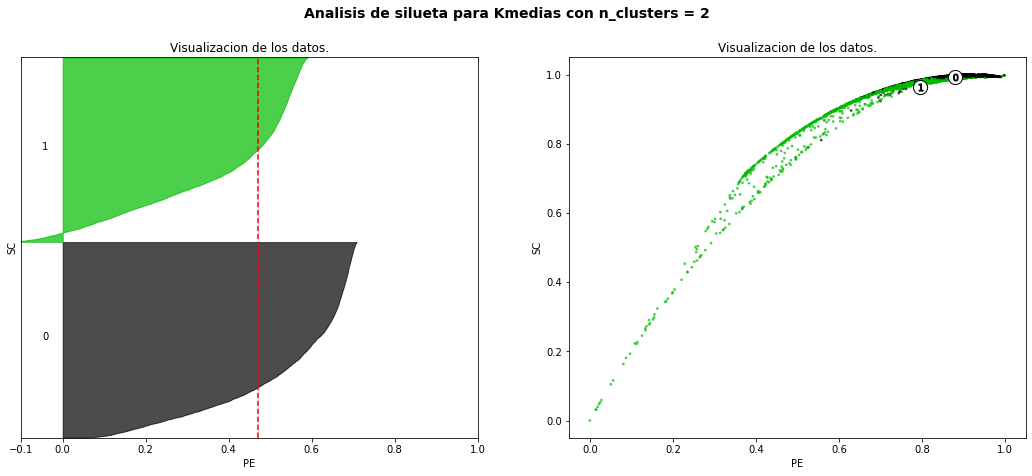

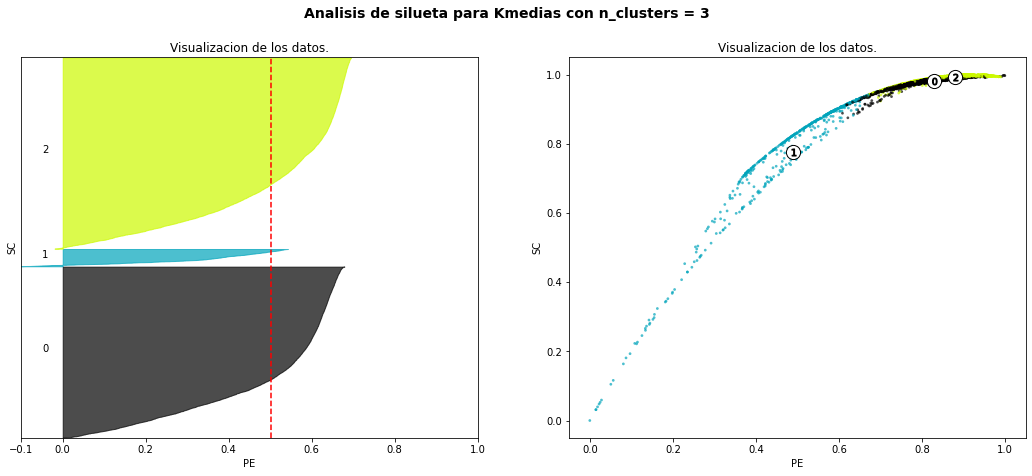

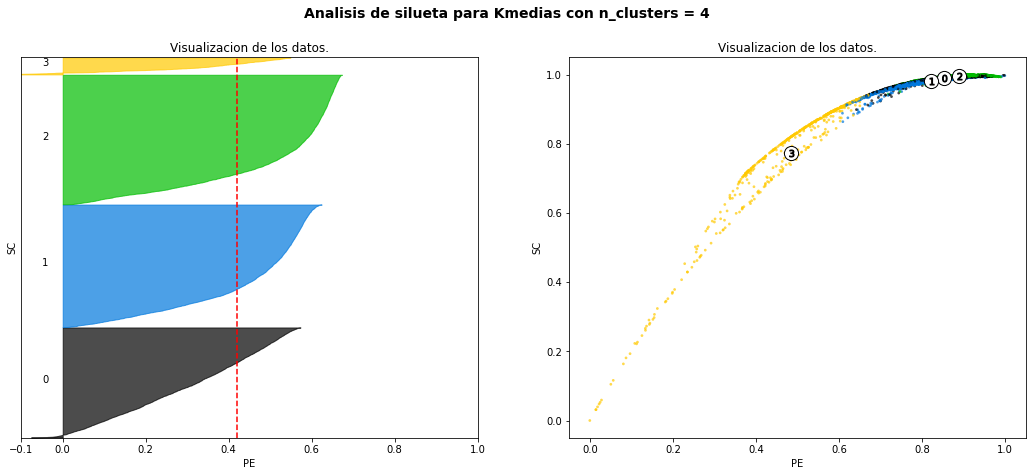

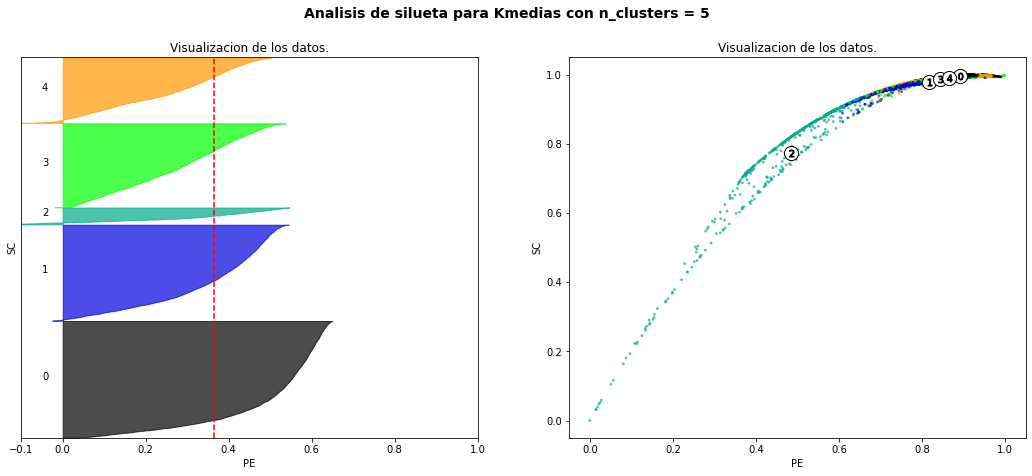

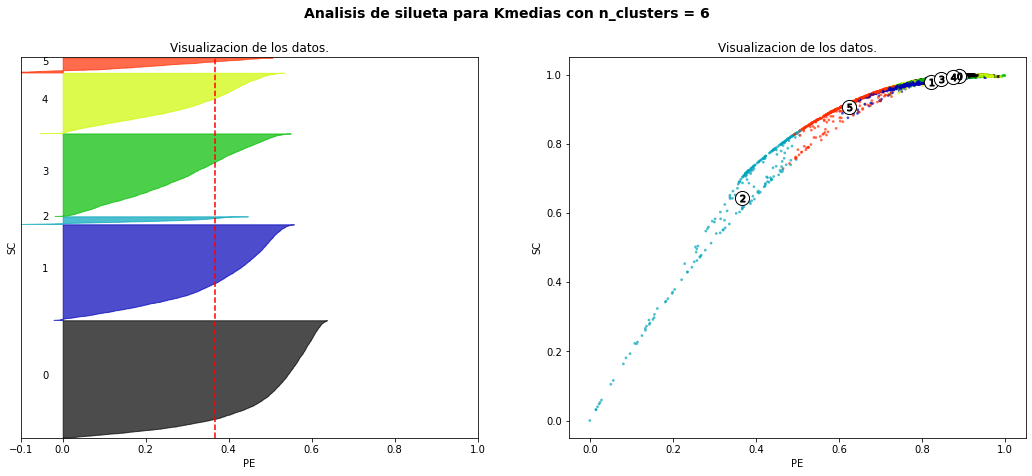

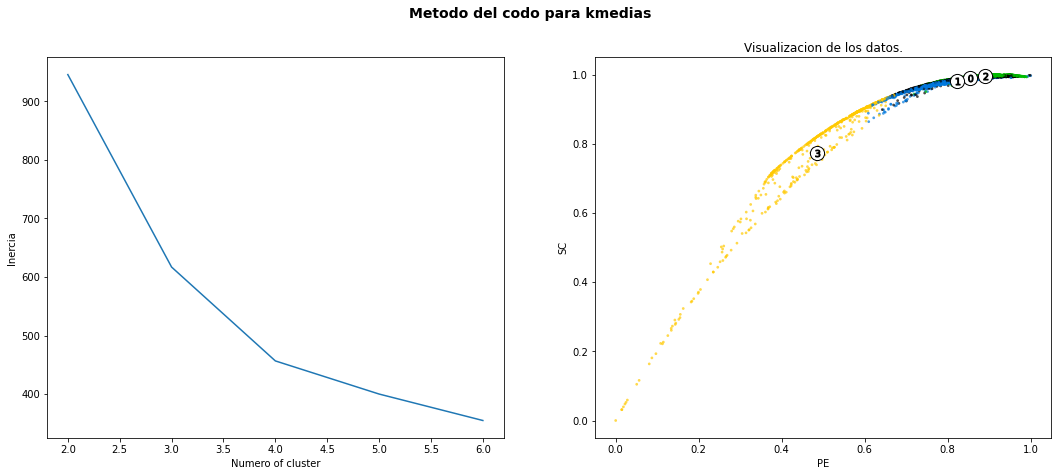

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=all_data_sin_eti_minmax

range_n_clusters = [2, 3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("PE")
    ax1.set_ylabel("SC")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("PE")
    ax2.set_ylabel("SC")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("PE")
ax2.set_ylabel("SC")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

A partir del análisis anterior, se puede dilucidar que, según el método del codo, el número óptimo de clusters es 3. Sin embargo, también se puede observar una inercia muy baja para n = 6. Respecto a los coeficientes de silueta, los valores más bajos corresponden a los clusters de n= 5 y 6. 

Sin embargo, consideramos que kmeans fue ineficiente en la separación de grupos por paciente o por estado. Si bien encontramos clusters, no pudimos correlacionarlos con la data e identificar qué es lo que los separa entre sí.

Creemos óptimo volver a probar kmeans trabajando con pacientes por separado, sin embargo, antes de ello, probaremos el método MeanShift y DBSCAN ya que sería más apropiado poder trabajar con el dataset de los 3 pacientes juntos.

#Analizamos los clústeres con MeanShift


In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.graph_objs as go

In [ ]:
ms = MeanShift(bandwidth=0.4, cluster_all= True, bin_seeding=True)

ms.fit(all_data_sin_eti_minmax)

clusters_labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters_labels)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 2


In [ ]:
all_data.columns

Index(['Patient', 'State', 'PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew'],
      dtype='object')

In [ ]:
bool_clust_0 = all_data["State"] == 0
bool_clust_1 = all_data["State"] == 1


#Aca se puede ir cambiando las variables que queremos plotear
variable_1=all_data.columns[3]
variable_2=all_data.columns[5]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=all_data_sin_eti_minmax[variable_1], y=all_data_sin_eti_minmax[variable_2],
                           mode='markers',
                        text=all_data.loc[:,'State'],
                           marker=dict(
                                size=5,
                                color = clusters_labels.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

cluster_cero =go.Scatter(x=all_data_sin_eti_minmax.loc[bool_clust_0,variable_1], y=all_data_sin_eti_minmax.loc[bool_clust_0,variable_2],name='Estado 0',
                      text=all_data.loc[bool_clust_0,'State'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

cluster_uno =go.Scatter(x=all_data_sin_eti_minmax.loc[bool_clust_1,variable_1], y=all_data_sin_eti_minmax.loc[bool_clust_1,variable_2],name='Estado 1',
                      text=all_data.loc[bool_clust_1,'State'],
                      textfont=dict(family='sans serif',size=10,color='orange'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,cluster_cero, cluster_uno]

layout = go.Layout(title="Mean Shift clustering",titlefont=dict(size=20),
                xaxis=dict(title=variable_1),
                yaxis=dict(title=variable_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig.show(renderer="colab")

In [ ]:
#Incorporamos los clusters al df
all_data_sin_eti_minmax['meanshift_2'] = clusters_labels #clusters


In [ ]:
#Incorporamos el estado y paciente

In [ ]:
all_data_sin_eti_minmax_SyP = [all_data_sin_eti_minmax,all_data[['State','Patient']]]
all_data_sin_eti_minmax_SyP = pd.concat(all_data_sin_eti_minmax_SyP, axis=1)
display(all_data_sin_eti_minmax_SyP)


PE        SC       GNE        SE       LZC       STE      Mean  \
0      0.959066  0.995263  0.938613  0.625295  0.804473  0.971534  0.406057   
1      0.867040  0.987452  0.807316  0.184334  0.481720  0.911380  0.465355   
2      0.869769  0.987834  0.811308  0.204489  0.493237  0.913157  0.409313   
3      0.857838  0.985710  0.793930  0.094916  0.409687  0.905243  0.340825   
4      0.697042  0.948269  0.563085  0.183261  0.284922  0.807904  0.387965   
...         ...       ...       ...       ...       ...       ...       ...   
12005  0.826205  0.986294  0.751801  0.393643  0.618833  0.886941  0.432939   
12006  0.779827  0.974350  0.684026  0.311221  0.511395  0.857745  0.578763   
12007  0.847501  0.989518  0.782036  0.499312  0.666355  0.900712  0.360463   
12008  0.788662  0.977561  0.697400  0.310445  0.516616  0.863355  0.505219   
12009  0.772811  0.969464  0.672659  0.199875  0.463227  0.852989  0.195036   

            Std      Skew  meanshift_2  State  Patient  
0      0.171739  0.683040            0    1.0      1.0  
1      0.543973  0.681005            0    0.0      1.0  
2      0.524786  0.677892            0    0.0      1.0  
3      0.545357  0.681464            0    0.0      1.0  
4      0.467985  0.677233            0    0.0      1.0  
...         ...       ...          ...    ...      ...  
12005  0.399755  0.685014            0    2.0      3.0  
12006  0.709294  0.681189            0    2.0      3.0  
12007  0.343513  0.683369            0    2.0      3.0  
12008  0.693494  0.684378            0    2.0      3.0  
12009  0.776631  0.685925            0    2.0      3.0  

[12010 rows x 12 columns]

In [ ]:
# Separamos los datos etiquetados por cluster
cluster_0 = all_data_sin_eti_minmax_SyP[all_data_sin_eti_minmax_SyP['meanshift_2'] == 0]
cluster_1 = all_data_sin_eti_minmax_SyP[all_data_sin_eti_minmax_SyP['meanshift_2'] == 1]


In [ ]:
print(cluster_0.shape, cluster_1.shape)
#La cantidad de datos en cada cluster no es homogenea

(11684, 12) (326, 12)


In [ ]:
cluster_0['State'].value_counts()

2.0    5850
0.0    5409
1.0     425
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

2.0    189
0.0    127
1.0     10
Name: State, dtype: int64

In [ ]:
cluster_0['Patient'].value_counts()

3.0    4637
2.0    4408
1.0    2639
Name: Patient, dtype: int64

In [ ]:
cluster_1['Patient'].value_counts()

1.0    165
2.0    132
3.0     29
Name: Patient, dtype: int64

Al igual que en la separación con kmeans, Meanshift no pudo separar el estado ni el paciente correctamente ya que ambos clusters poseen una proporción similar de los datos.

# Analizamos los clústeres con DBSCAN

BDSCAN, a diferencia de Kmeans, permite detectar los outliers. Debido a que estamos trabajando con un dataset que incluye valores anómalos, creemos conveniente el uso de este algoritmo de segmentación.

1 - DBSCAN con todo el dataframe (todas las variables)

Calculamos la distancia: 

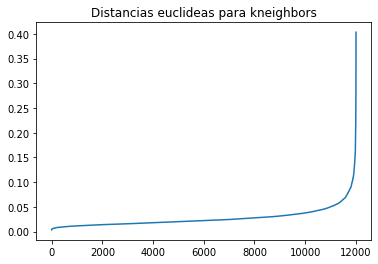

In [ ]:
from pandas.core.common import random_state
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2, metric= 'euclidean')
nbrs = neigh.fit(all_data_sin_eti_minmax)
distances, indices = nbrs.kneighbors(all_data_sin_eti_minmax)

# Clasificamos y representamos los resultados.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title("Distancias euclideas para kneighbors")
plt.plot(distances)

Se elige la distancia = 0.09 ya que aproximadamente ahí sucede el quiebre/codo

In [ ]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.09, min_samples=5).fit(all_data_sin_eti_minmax)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
from collections import Counter
Counter(clusters.labels_)
#Los clusters no son homogeneos. El cluster 1 se lleva la mayor parte de los datos.

Counter({0: 11530, 1: 65, -1: 331, 2: 5, 3: 9, 4: 10, 5: 21, 7: 30, 6: 9})

In [ ]:
#Agregamos los valores de clusters por DBSCAN al df
df_clusters['DBSCAN_23'] = clusters.labels_ #clusters

df_PCA_DBSCAN = [df_clusters,df_PCA]
df_PCA_DBSCAN = pd.concat(df_PCA_DBSCAN, axis=1)


In [ ]:
df_PCA_DBSCAN.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew',
       'kmeans_6', 'DBSCAN_23', 'PCA1', 'PCA2'],
      dtype='object')

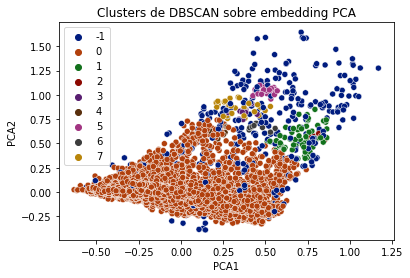

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=df_PCA_DBSCAN, x="PCA1", y="PCA2", hue=clusters.labels_, legend="full", palette="dark").set(title='Clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [ ]:
df_PCA_DBSCAN

PE        SC       GNE        SE       LZC       STE  \
0      0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...         ...       ...       ...       ...       ...       ...   
12005  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
12006  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
12007  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
12008  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
12009  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

               Mean        Std      Skew  kmeans_6  DBSCAN_23      PCA1  \
0      4.426225e-06  15.557899 -0.000629         2          0 -0.269388   
1      2.075434e-05  48.467869 -0.031036         3          0  0.352992   
2      5.322688e-06  46.771531 -0.077559         3          0  0.326777   
3     -1.353617e-05  48.590217 -0.024175         3          0  0.464839   
4     -5.555946e-07  41.749673 -0.087401         3          0  0.561671   
...             ...        ...       ...       ...        ...       ...   
12005  1.182837e-05  35.717262  0.028871         4          0  0.125326   
12006  5.198219e-05  63.084220 -0.028295         3          0  0.325671   
12007 -8.128566e-06  30.744780  0.004287         4          0 -0.001877   
12008  3.173127e-05  61.687320  0.019371         3          0  0.314644   
12009 -5.368015e-05  69.037631  0.042493         3          0  0.449711   

           PCA2  
0     -0.056360  
1     -0.195801  
2     -0.186016  
3     -0.207400  
4      0.116558  
...         ...  
12005 -0.027249  
12006 -0.088520  
12007  0.002479  
12008 -0.097502  
12009 -0.144649  

[12010 rows x 13 columns]

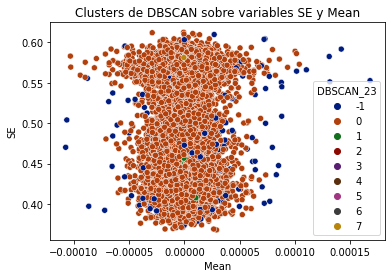

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=df_PCA_DBSCAN, x="Mean", y="SE", hue='DBSCAN_23', legend="full", palette="dark").set(title='Clusters de DBSCAN sobre variables SE y Mean')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

En ambas visualizaciones y en el conteo de frecuencia, se puede observar que el cluster0 se lleva un 96% de los datos (11530 de 12010 totales) por lo que no resulta útil tal como está planteado.
A continuación se deciden probar otras estrategias utilizando este mismo modelo.

### 2 - DBSCAN con dataframe con variables Entropy

Debido a que no logramos los resultados esperados utilizando el dataset completo, probamos con deshacernos de las variables estadísticas y quedarnos solamente con las variables relacionadas a la entropía: `'PE'`, `'GNE'`, `'SE'`, `'STE'`.

In [ ]:
# Hacemos una copia del DF
all_data_entropy = all_data_sin_eti_minmax.copy()
all_data_entropy.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew',
       'meanshift_2'],
      dtype='object')

In [ ]:
# Eliminamos las variables que no queremos analizar
all_data_entropy = all_data_entropy.drop(columns=[ 'SC','LZC','Mean', 'Std', 'Skew'])


In [ ]:
all_data_entropy.columns

Index(['PE', 'GNE', 'SE', 'STE', 'meanshift_2'], dtype='object')

In [ ]:
all_data_entropy.shape

(12010, 5)

In [ ]:
# Elegimos un epsilon de 0.05 
clusters2 = DBSCAN(eps=0.05, min_samples=5).fit(all_data_entropy)
# get cluster labels
clusters2.labels_
set(clusters2.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
Counter(clusters2.labels_)
#Otra vez, el cluster 0 posee la mayor parte de los datos.

Counter({0: 11632,
         1: 44,
         -1: 236,
         3: 9,
         2: 10,
         4: 17,
         5: 23,
         6: 4,
         7: 5,
         8: 10,
         9: 20})

Aplicamos PCA al nuevo DF

In [ ]:
#PCA con 2 componentes

pca = PCA(n_components=2)
componentes = pca.fit_transform(all_data_entropy)
componentes.shape

(12010, 2)

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 2 componentes principales.
pca.explained_variance_ratio_.sum()*100

93.89255654961565

In [ ]:
# Armamos un DF con los dos componentes principales de PCA que explican 
df_PCA = pd.DataFrame(componentes[:, :2], columns = ['PCA1',
'PCA2'])

In [ ]:
df_PCA_entropy = [all_data_entropy,df_PCA]
df_PCA_entropy = pd.concat(df_PCA_entropy, axis=1)
display(df_PCA_entropy)


PE       GNE        SE       STE  meanshift_2      PCA1      PCA2
0      0.959066  0.938613  0.625295  0.971534            0 -0.185737 -0.105052
1      0.867040  0.807316  0.184334  0.911380            0  0.273239 -0.200371
2      0.869769  0.811308  0.204489  0.913157            0  0.253347 -0.194380
3      0.857838  0.793930  0.094916  0.905243            0  0.359268 -0.230286
4      0.697042  0.563085  0.183261  0.807904            0  0.401745 -0.009300
...         ...       ...       ...       ...          ...       ...       ...
12005  0.826205  0.751801  0.393643  0.886941            0  0.117971 -0.061044
12006  0.779827  0.684026  0.311221  0.857745            0  0.226080 -0.045357
12007  0.847501  0.782036  0.499312  0.900712            0  0.008625 -0.037239
12008  0.788662  0.697400  0.310445  0.863355            0  0.219894 -0.056023
12009  0.772811  0.672659  0.199875  0.852989            0  0.330168 -0.087192

[12010 rows x 7 columns]

In [ ]:
# Creamos una copia del DF
df_clusters_entropy = all_data_entropy.copy()

In [ ]:
#Agregamos los valores de clusters por DBSCAN al DF
df_clusters_entropy['DBSCAN_E'] = clusters2.labels_ #clusters

# Agregamos las columnas PCA, Patient y State

df_PCA_DBSCAN_E = [df_clusters_entropy,df_PCA, all_data[['State','Patient']]]
df_PCA_DBSCAN_E  = pd.concat(df_PCA_DBSCAN_E , axis=1)
display(df_PCA_DBSCAN_E)

PE       GNE        SE       STE  meanshift_2  DBSCAN_E  \
0      0.959066  0.938613  0.625295  0.971534            0         0   
1      0.867040  0.807316  0.184334  0.911380            0         0   
2      0.869769  0.811308  0.204489  0.913157            0         0   
3      0.857838  0.793930  0.094916  0.905243            0         0   
4      0.697042  0.563085  0.183261  0.807904            0         0   
...         ...       ...       ...       ...          ...       ...   
12005  0.826205  0.751801  0.393643  0.886941            0         0   
12006  0.779827  0.684026  0.311221  0.857745            0         0   
12007  0.847501  0.782036  0.499312  0.900712            0         0   
12008  0.788662  0.697400  0.310445  0.863355            0         0   
12009  0.772811  0.672659  0.199875  0.852989            0         0   

           PCA1      PCA2  State  Patient  
0     -0.185737 -0.105052    1.0      1.0  
1      0.273239 -0.200371    0.0      1.0  
2      0.253347 -0.194380    0.0      1.0  
3      0.359268 -0.230286    0.0      1.0  
4      0.401745 -0.009300    0.0      1.0  
...         ...       ...    ...      ...  
12005  0.117971 -0.061044    2.0      3.0  
12006  0.226080 -0.045357    2.0      3.0  
12007  0.008625 -0.037239    2.0      3.0  
12008  0.219894 -0.056023    2.0      3.0  
12009  0.330168 -0.087192    2.0      3.0  

[12010 rows x 10 columns]

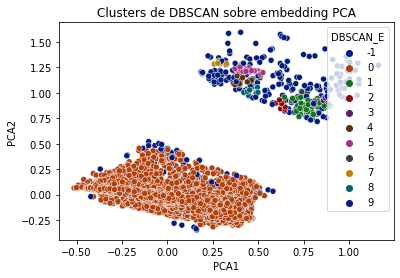

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=df_PCA_DBSCAN_E, x='PCA1', y='PCA2', hue='DBSCAN_E', legend="full", palette="dark").set(title='Clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

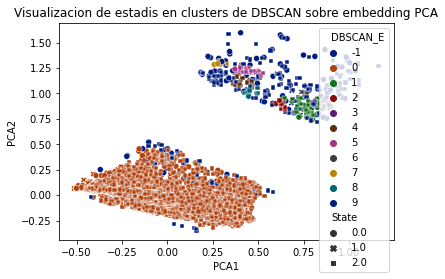

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=df_PCA_DBSCAN_E, x='PCA1', y='PCA2', hue='DBSCAN_E', legend="full", palette="dark", style = 'State').set(title='Visualizacion de estadis en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


TypeError: ignored

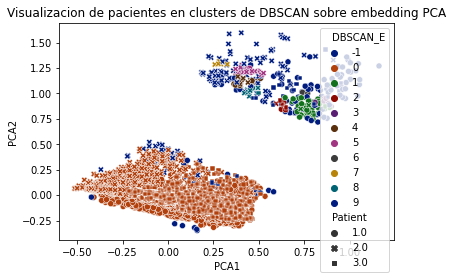

In [ ]:
#Visualizacion de los pacientes en los clusters 
sns.scatterplot(data=df_PCA_DBSCAN_E, x='PCA1', y='PCA2', hue='DBSCAN_E', legend="full", palette="dark", style = 'Patient').set(title='Visualizacion de pacientes en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


In [ ]:
#Descomentar si es necesario, tarda mucho en correr
#sns.pairplot(df_PCA_DBSCAN_E, hue='State')

Otra vez, el modelo DBSCAN agrupó a la mayoría de los datos en un solo cluster (cluster 0). Esto no resulta útil ya que en ese cluster se pueden observar datos de los dos estados y los tres pacientes. A continación, se plantea otra estrategia:

### 3 - DBSCAN solamente con SE y STE

Las variables SE y STE tienen una correlación baja como vimos anteriormente. En el gráfico 2d entre estas 2 variables (visto en el entregable1), se pueden distinguir ambas etiquetas (State 0 y State 1). Por esa razon, decidimos clusterizar con DBSCAN sobre estas dos variables a ver si nos brindan alguna información relevante:


In [ ]:
# Copiamos el DF 
df_SE_STE = all_data_entropy.copy()

In [ ]:
df_SE_STE.columns

Index(['PE', 'GNE', 'SE', 'STE', 'meanshift_2'], dtype='object')

In [ ]:
# Eliminamos las columnas que no queremos analizar
df_SE_STE = df_SE_STE.drop(columns=['PE', 'GNE'])

In [ ]:
# Probamos distintos valores de épsilon para ver cual se acerca más a los clústeres q queremos formar
clusters3 = DBSCAN(eps=0.06, min_samples=5).fit(df_SE_STE)
# get cluster labels
clusters3.labels_
set(clusters3.labels_)

{-1, 0, 1, 2, 3}

In [ ]:
Counter(clusters3.labels_)
#El cluster 0 se llevó más del 95% de los datos:

Counter({0: 11676, 1: 228, -1: 52, 3: 20, 2: 34})

In [ ]:
#Agregamos los valores de clusters por DBSCAN al df
df_SE_STE['DBSCAN_SE_STE'] = clusters3.labels_ #clusters


In [ ]:
df_SE_STE.head(5)

SE       STE  meanshift_2  DBSCAN_SE_STE
0  0.625295  0.971534            0              0
1  0.184334  0.911380            0              0
2  0.204489  0.913157            0              0
3  0.094916  0.905243            0              0
4  0.183261  0.807904            0              0

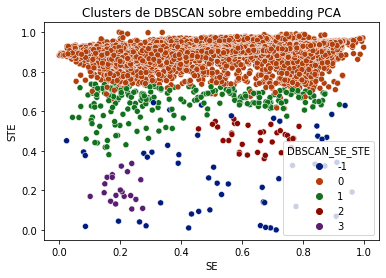

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=df_SE_STE, x='SE', y='STE', hue='DBSCAN_SE_STE', legend="full", palette="dark").set(title='Clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [ ]:
# Agregamos las columas de State y Patient para ver si dentro de los clústeres hay State 0 y 1 a la vez 
df_DBSCAN_SE_STE = [df_SE_STE, all_data[['State','Patient']]]
df_DBSCAN_SE_STE  = pd.concat(df_DBSCAN_SE_STE , axis=1)
display(df_DBSCAN_SE_STE)

SE       STE  meanshift_2  DBSCAN_SE_STE  State  Patient
0      0.625295  0.971534            0              0    1.0      1.0
1      0.184334  0.911380            0              0    0.0      1.0
2      0.204489  0.913157            0              0    0.0      1.0
3      0.094916  0.905243            0              0    0.0      1.0
4      0.183261  0.807904            0              0    0.0      1.0
...         ...       ...          ...            ...    ...      ...
12005  0.393643  0.886941            0              0    2.0      3.0
12006  0.311221  0.857745            0              0    2.0      3.0
12007  0.499312  0.900712            0              0    2.0      3.0
12008  0.310445  0.863355            0              0    2.0      3.0
12009  0.199875  0.852989            0              0    2.0      3.0

[12010 rows x 6 columns]

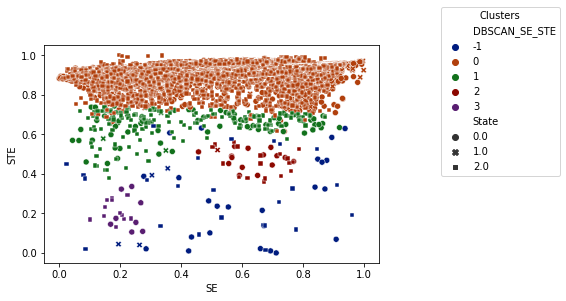

In [ ]:
#Visualizacion de clusters distinguiento los Estados
p = sns.scatterplot(data=df_DBSCAN_SE_STE, x='SE', y='STE', hue='DBSCAN_SE_STE', legend="full", palette="dark", style='State')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

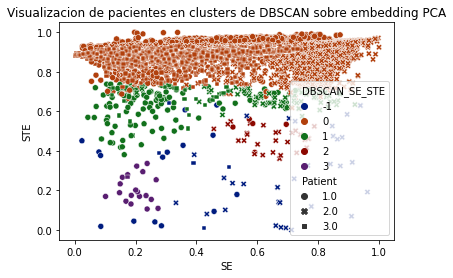

In [ ]:
#Visualizacion de clusters distinguiento los Pacientes
sns.scatterplot(data=df_DBSCAN_SE_STE, x='SE', y='STE', hue='DBSCAN_SE_STE', legend="full", palette="dark", style='Patient').set(title='Visualizacion de pacientes en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

A pesar de las distintas puebas realizadas, con dataset completo y analizando algunas variables por separado, con DBSCAN no logramos diferenciar entre estados ni pacientes. En la mayoría de las pruebas, observamos que agrupó la mayor cantidad de los datos en un solo cluster (Cluster 0).<BR>
Si analizamos la salida del clúster, el 99% de los registros etiquetados con State 1, están en el clúster 0, el que tiene el 99% de los datos. Por lo que no se estaría separando por estado. A su vez, también se observa que este mismo cluster posee datos de los 3 pacientes, por lo que tampoco se estaría separando por paciente. 

###4 - DBSCAN sobre dataframe sin variables Entropy ni variables estadísticas

Se decidió eliminar las variables entropy y las variables estadísticas quedándonos solamente con las variables `'SC'`, `'LZC'`. 

In [ ]:
# Hacemos una copia del DF
all_data_sin_entropy = all_data_sin_eti_minmax.copy()
all_data_sin_entropy.columns

Index(['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean', 'Std', 'Skew',
       'meanshift_2'],
      dtype='object')

In [ ]:
# Eliminamos las variables que no queremos analizar
all_data_sin_entropy = all_data_sin_entropy.drop(columns=[ 'PE', 'GNE', 'SE', 'STE', 'Mean', 'Std', 'Skew'])


In [ ]:
all_data_sin_entropy.columns

Index(['SC', 'LZC', 'meanshift_2'], dtype='object')

In [ ]:
all_data_sin_entropy.shape

(12010, 3)

In [ ]:
# Elegimos un epsilon de 0.05 
clusters4 = DBSCAN(eps=0.03, min_samples=5).fit(all_data_sin_entropy)
# get cluster labels
clusters4.labels_
set(clusters4.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
Counter(clusters4.labels_)

Counter({0: 11674,
         1: 204,
         2: 22,
         3: 12,
         5: 6,
         -1: 61,
         4: 6,
         6: 6,
         10: 5,
         7: 5,
         8: 4,
         9: 5})

In [ ]:
#Agregamos los valores de clusters por DBSCAN al df
all_data_sin_entropy['DBSCAN_SC_LZC'] = clusters4.labels_ #clusters


In [ ]:
all_data_sin_entropy.head(5)

SC       LZC  meanshift_2  DBSCAN_SC_LZC
0  0.995263  0.804473            0              0
1  0.987452  0.481720            0              0
2  0.987834  0.493237            0              0
3  0.985710  0.409687            0              0
4  0.948269  0.284922            0              0

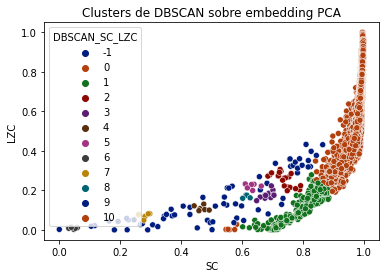

In [ ]:
#Visualizacion de clusters
sns.scatterplot(data=all_data_sin_entropy, x='SC', y='LZC', hue='DBSCAN_SC_LZC', legend="full", palette="dark").set(title='Clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [ ]:
# Agregamos las columas de State y Patient para ver si dentro de los clústeres hay State 0 y 1 a la vez 
df_DBSCAN_SC_LZC = [all_data_sin_entropy, all_data[['State','Patient']]]
df_DBSCAN_SC_LZC  = pd.concat(df_DBSCAN_SC_LZC , axis=1)
display(df_DBSCAN_SC_LZC)

SC       LZC  meanshift_2  DBSCAN_SC_LZC  State  Patient
0      0.995263  0.804473            0              0    1.0      1.0
1      0.987452  0.481720            0              0    0.0      1.0
2      0.987834  0.493237            0              0    0.0      1.0
3      0.985710  0.409687            0              0    0.0      1.0
4      0.948269  0.284922            0              0    0.0      1.0
...         ...       ...          ...            ...    ...      ...
12005  0.986294  0.618833            0              0    2.0      3.0
12006  0.974350  0.511395            0              0    2.0      3.0
12007  0.989518  0.666355            0              0    2.0      3.0
12008  0.977561  0.516616            0              0    2.0      3.0
12009  0.969464  0.463227            0              0    2.0      3.0

[12010 rows x 6 columns]

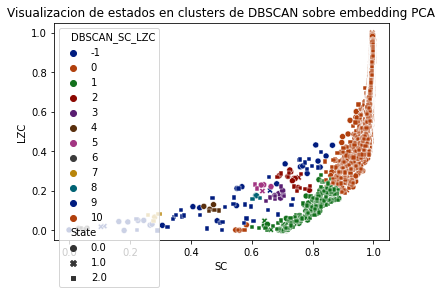

In [ ]:
#Visualizacion de clusters con State
sns.scatterplot(data=df_DBSCAN_SC_LZC, x='SC', y='LZC', hue='DBSCAN_SC_LZC', legend="full", palette="dark", style='State').set(title='Visualizacion de estados en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

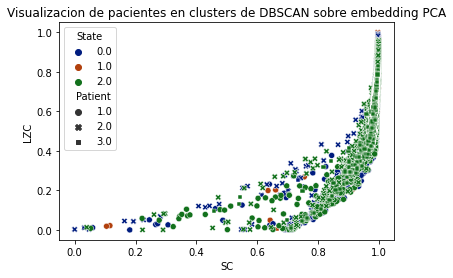

In [ ]:
#Visualizacion de clusters con Patient y State
sns.scatterplot(data=df_DBSCAN_SC_LZC, x='SC', y='LZC', hue='State', legend="full", palette="dark", style='Patient').set(title='Visualizacion de pacientes en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

En este último gráfico, vemos que mas allá de los clústeres formados, están muy dispersos los estados, observándose una mayoria de elementos del State 2 (sin etiquetas), con los pacientes mezclados.

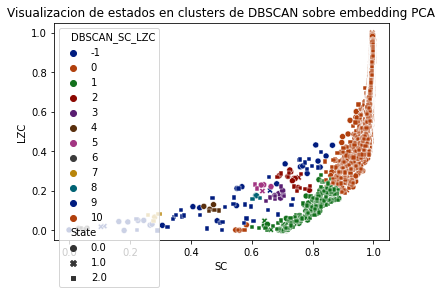

In [ ]:
#Visualizacion de clusters con Patient y State
sns.scatterplot(data=df_DBSCAN_SC_LZC, x='SC', y='LZC', hue='DBSCAN_SC_LZC', legend="full", palette="dark", style='State').set(title='Visualizacion de estados en clusters de DBSCAN sobre embedding PCA')
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

Lo que pretendíamos ver con esta última viualización era si todo lo que no era clúster 0 ni 'outlier' (-1), podía agruparse formando algún estado, pero no se observa. El clúster verde (cluster 1) aparentemente estaría formado por State 0 y 2. En ese caso podría ser que esos elementos del State 2 (sin etiqueta) pertenezcan al State 0.<br>

Del análisis de los clústeres, se observa que el 98% se los datos etiquetados con State 1 se encuentran en el cluster 0, el de mayor densidad. El coeficiente de correlación de todos los clústeres menos el 0 es bastante alto, 0.8099, mientras que el coef de correlación del clúster 0 es de 0.012

# Trabajamos individualmente con cada paciente

Debido a que no logramos ver ninguna separación por estado con todos los pacientes juntos, consideramos que deberíamos trabajar con pacientes separados. Esto tiene mucho sentido ya que es esperable que cada paciente se comporte de manera diferente. Con el auge de la medicina de precisión, cada vez existen más herramientas que contemplan la posibilidad de personalizar los métodos y análisis para cada paciente en particular.

### Trabajamos con el Paciente 1 solamente

In [ ]:
alldata_P1 = all_data_clusters[all_data_clusters['Patient']==1]
alldata_P1.reset_index(inplace=True, drop=True)
alldata_P1

PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  kmeans_2      PCA1      PCA2  State  \
0     4.426225e-06  15.557899 -0.000629         0 -0.269388 -0.056360    1.0   
1     2.075434e-05  48.467869 -0.031036         1  0.352992 -0.195801    0.0   
2     5.322688e-06  46.771531 -0.077559         1  0.326777 -0.186016    0.0   
3    -1.353617e-05  48.590217 -0.024175         1  0.464839 -0.207400    0.0   
4    -5.555946e-07  41.749673 -0.087401         1  0.561671  0.116558    0.0   
...            ...        ...       ...       ...       ...       ...    ...   
2799 -6.380187e-06  20.509189 -0.008385         0 -0.039793  0.009171    2.0   
2800 -1.281961e-05  34.162332 -0.039207         1  0.111357 -0.219212    2.0   
2801 -8.332419e-09   5.592382 -0.204169         1  0.824189  0.899857    2.0   
2802  2.273862e-06  22.671524  0.029680         0 -0.084658 -0.127767    2.0   
2803 -1.226151e-05  15.241925 -0.125999         0 -0.254023  0.025483    2.0   

      Patient  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
...       ...  
2799      1.0  
2800      1.0  
2801      1.0  
2802      1.0  
2803      1.0  

[2804 rows x 14 columns]

In [ ]:
# Eliminamos la columna de estado, paciente y otras variables en el DF
alldata_P1_sin_eti = alldata_P1.drop(columns=['PCA1', 'PCA2', 'kmeans_2', 'State', 'Patient'])

### Analizamos los clusteres con K-means para el paciente 1

In [ ]:
# Probamos con 2 clústeres, para evaluar si clusteriza por estados 
n_clust = 2

km = KMeans(n_clusters=n_clust)
km.fit(alldata_P1_sin_eti)


KMeans(n_clusters=2)

In [ ]:
# Etiquetas asignadas por el algoritmo
clusters = km.labels_

In [ ]:
df_clusters_P1=alldata_P1_sin_eti.copy()
df_clusters_P1['kmeans_2_P1'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters_P1

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  kmeans_2_P1  
0     4.426225e-06  15.557899 -0.000629            1  
1     2.075434e-05  48.467869 -0.031036            0  
2     5.322688e-06  46.771531 -0.077559            0  
3    -1.353617e-05  48.590217 -0.024175            0  
4    -5.555946e-07  41.749673 -0.087401            0  
...            ...        ...       ...          ...  
2799 -6.380187e-06  20.509189 -0.008385            1  
2800 -1.281961e-05  34.162332 -0.039207            1  
2801 -8.332419e-09   5.592382 -0.204169            1  
2802  2.273862e-06  22.671524  0.029680            1  
2803 -1.226151e-05  15.241925 -0.125999            1  

[2804 rows x 10 columns]

### PCA sobre DF con clústeres

In [ ]:
#PCA con 9 componentes
pca = PCA(n_components=9)
componentes = pca.fit_transform(alldata_P1_sin_eti)
componentes.shape

(2804, 9)

In [ ]:
pca2 = PCA(n_components=2)
componentes = pca2.fit_transform(alldata_P1_sin_eti)
componentes.shape

(2804, 2)

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 2 componentes principales.
pca2.explained_variance_ratio_.sum()*100

99.98853394771383

In [ ]:
df_PCA_P1 = pd.DataFrame(componentes[:, :2], columns = ['PCA1',
'PCA2'])

In [ ]:
df_PCA_kmeans_P1 = [df_clusters_P1,df_PCA_P1]
df_PCA_kmeans_P1 = pd.concat(df_PCA_kmeans_P1, axis=1)
display(df_PCA_kmeans_P1)


PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  kmeans_2_P1       PCA1      PCA2  
0     4.426225e-06  15.557899 -0.000629            1 -20.715685 -0.186441  
1     2.075434e-05  48.467869 -0.031036            0  12.194504 -0.028057  
2     5.322688e-06  46.771531 -0.077559            0  10.498105 -0.000341  
3    -1.353617e-05  48.590217 -0.024175            0  12.316959 -0.015637  
4    -5.555946e-07  41.749673 -0.087401            0   5.476306  0.171801  
...            ...        ...       ...          ...        ...       ...  
2799 -6.380187e-06  20.509189 -0.008385            1 -15.764328 -0.088516  
2800 -1.281961e-05  34.162332 -0.039207            1  -2.111121 -0.101374  
2801 -8.332419e-09   5.592382 -0.204169            1 -30.681045  0.559540  
2802  2.273862e-06  22.671524  0.029680            1 -13.601938 -0.177349  
2803 -1.226151e-05  15.241925 -0.125999            1 -21.031816 -0.064081  

[2804 rows x 12 columns]

[Text(0.5, 1.0, 'Clusters de kmeans sobre embedding PCA')]

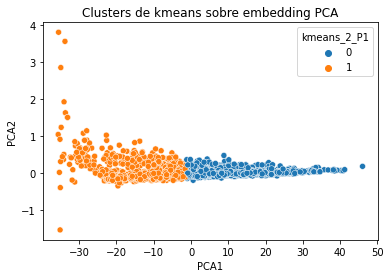

In [ ]:
sns.scatterplot(data=df_PCA_kmeans_P1, x='PCA1', y='PCA2', hue="kmeans_2_P1").set(title='Clusters de kmeans sobre embedding PCA')

In [ ]:
#Descomentar si es necesario porque tarda mucho
#sns.pairplot(df_PCA_kmeans_P1, hue='kmeans_2_P1')

### Incorporamos las columnas State y Patient

In [ ]:
all_data_clusters_P1 = [df_PCA_kmeans_P1,alldata_P1[['State','Patient']]]
all_data_clusters_P1 = pd.concat(all_data_clusters_P1, axis=1)
display(all_data_clusters_P1)


PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  kmeans_2_P1       PCA1      PCA2  \
0     4.426225e-06  15.557899 -0.000629            1 -20.715685 -0.186441   
1     2.075434e-05  48.467869 -0.031036            0  12.194504 -0.028057   
2     5.322688e-06  46.771531 -0.077559            0  10.498105 -0.000341   
3    -1.353617e-05  48.590217 -0.024175            0  12.316959 -0.015637   
4    -5.555946e-07  41.749673 -0.087401            0   5.476306  0.171801   
...            ...        ...       ...          ...        ...       ...   
2799 -6.380187e-06  20.509189 -0.008385            1 -15.764328 -0.088516   
2800 -1.281961e-05  34.162332 -0.039207            1  -2.111121 -0.101374   
2801 -8.332419e-09   5.592382 -0.204169            1 -30.681045  0.559540   
2802  2.273862e-06  22.671524  0.029680            1 -13.601938 -0.177349   
2803 -1.226151e-05  15.241925 -0.125999            1 -21.031816 -0.064081   

      State  Patient  
0       1.0      1.0  
1       0.0      1.0  
2       0.0      1.0  
3       0.0      1.0  
4       0.0      1.0  
...     ...      ...  
2799    2.0      1.0  
2800    2.0      1.0  
2801    2.0      1.0  
2802    2.0      1.0  
2803    2.0      1.0  

[2804 rows x 14 columns]

[Text(0.5, 1.0, 'Visualizacion de estados en clusters de kmeans sobre embedding PCA')]

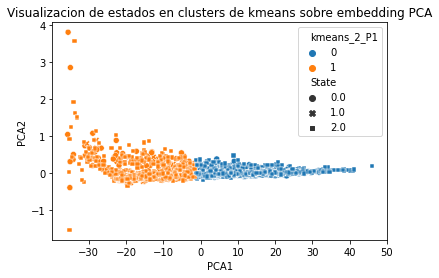

In [ ]:
sns.scatterplot(data=all_data_clusters_P1, x='PCA1', y='PCA2', hue='kmeans_2_P1', style = 'State').set(title='Visualizacion de estados en clusters de kmeans sobre embedding PCA')

In [ ]:
#Descomentar si es necesario porque tarda mucho:
#sns.scatterplot(data=all_data_clusters_P1, x='PCA1', y='PCA2', hue= 'State')

In [ ]:
# Separamos los datos etiquetados por cluster
cluster_0 = all_data_clusters_P1[all_data_clusters_P1['kmeans_2_P1'] == 0]
cluster_1 = all_data_clusters_P1[all_data_clusters_P1['kmeans_2_P1'] == 1]

In [ ]:
all_data_clusters_P1

PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  kmeans_2_P1       PCA1      PCA2  \
0     4.426225e-06  15.557899 -0.000629            1 -20.715685 -0.186441   
1     2.075434e-05  48.467869 -0.031036            0  12.194504 -0.028057   
2     5.322688e-06  46.771531 -0.077559            0  10.498105 -0.000341   
3    -1.353617e-05  48.590217 -0.024175            0  12.316959 -0.015637   
4    -5.555946e-07  41.749673 -0.087401            0   5.476306  0.171801   
...            ...        ...       ...          ...        ...       ...   
2799 -6.380187e-06  20.509189 -0.008385            1 -15.764328 -0.088516   
2800 -1.281961e-05  34.162332 -0.039207            1  -2.111121 -0.101374   
2801 -8.332419e-09   5.592382 -0.204169            1 -30.681045  0.559540   
2802  2.273862e-06  22.671524  0.029680            1 -13.601938 -0.177349   
2803 -1.226151e-05  15.241925 -0.125999            1 -21.031816 -0.064081   

      State  Patient  
0       1.0      1.0  
1       0.0      1.0  
2       0.0      1.0  
3       0.0      1.0  
4       0.0      1.0  
...     ...      ...  
2799    2.0      1.0  
2800    2.0      1.0  
2801    2.0      1.0  
2802    2.0      1.0  
2803    2.0      1.0  

[2804 rows x 14 columns]

In [ ]:
cluster_0['State'].value_counts()

2.0    831
0.0    684
1.0     36
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

2.0    705
0.0    443
1.0    105
Name: State, dtype: int64

In [ ]:
cluster_0['Patient'].value_counts()

1.0    1551
Name: Patient, dtype: int64

In [ ]:
cluster_1['Patient'].value_counts()

1.0    1253
Name: Patient, dtype: int64

Al igual que kmeans para todos los pacientes juntos, kmeans para el paciente 1 solamente no logró clusterizar como esperábamos. Se observa que ambos clusters poseen información de todos los estados y pacientes por lo que, no sabemos qué es lo que los está separando. 

#### **Grafico de Silueta** para todos los pacientes juntos
#### Kmeans con n= 2, 3, 4, 5 y 6

In [ ]:
alldata_P1_sin_eti

PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  
0     4.426225e-06  15.557899 -0.000629  
1     2.075434e-05  48.467869 -0.031036  
2     5.322688e-06  46.771531 -0.077559  
3    -1.353617e-05  48.590217 -0.024175  
4    -5.555946e-07  41.749673 -0.087401  
...            ...        ...       ...  
2799 -6.380187e-06  20.509189 -0.008385  
2800 -1.281961e-05  34.162332 -0.039207  
2801 -8.332419e-09   5.592382 -0.204169  
2802  2.273862e-06  22.671524  0.029680  
2803 -1.226151e-05  15.241925 -0.125999  

[2804 rows x 9 columns]

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.6489919046563831
Para n_clusters = 3 El silhouette_score promedio es : 0.5651387234937683
Para n_clusters = 4 El silhouette_score promedio es : 0.5820018137518086
Para n_clusters = 5 El silhouette_score promedio es : 0.576222280274413
Para n_clusters = 6 El silhouette_score promedio es : 0.5735238035202264


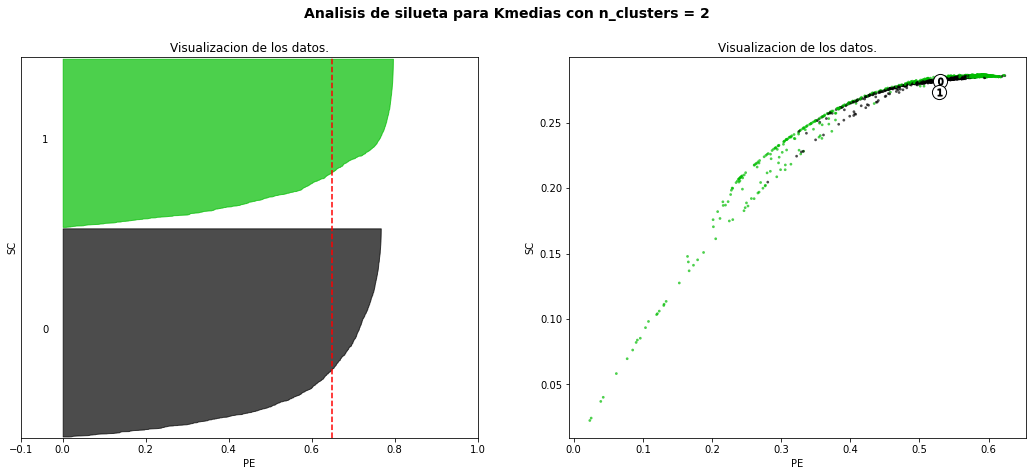

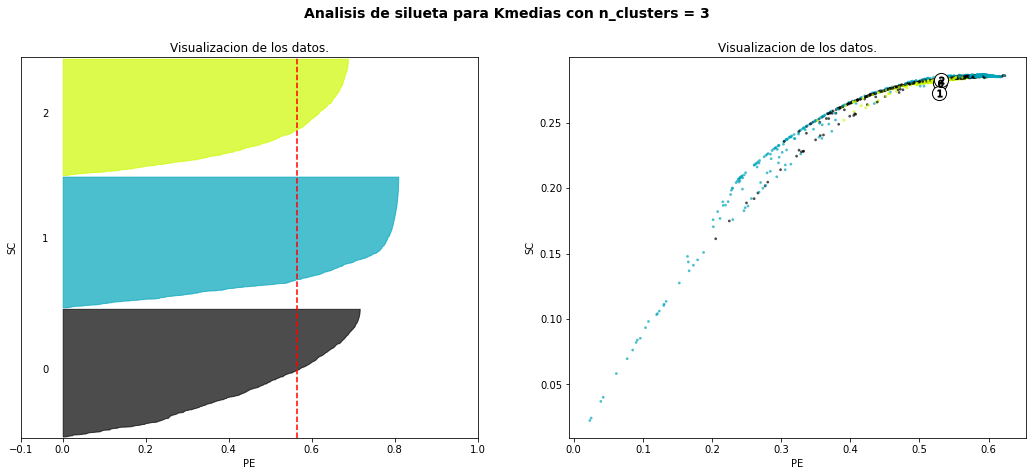

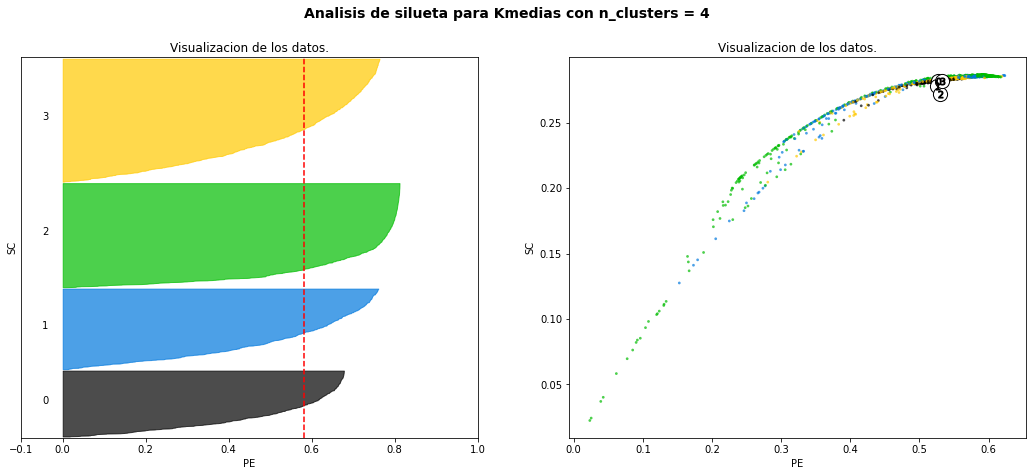

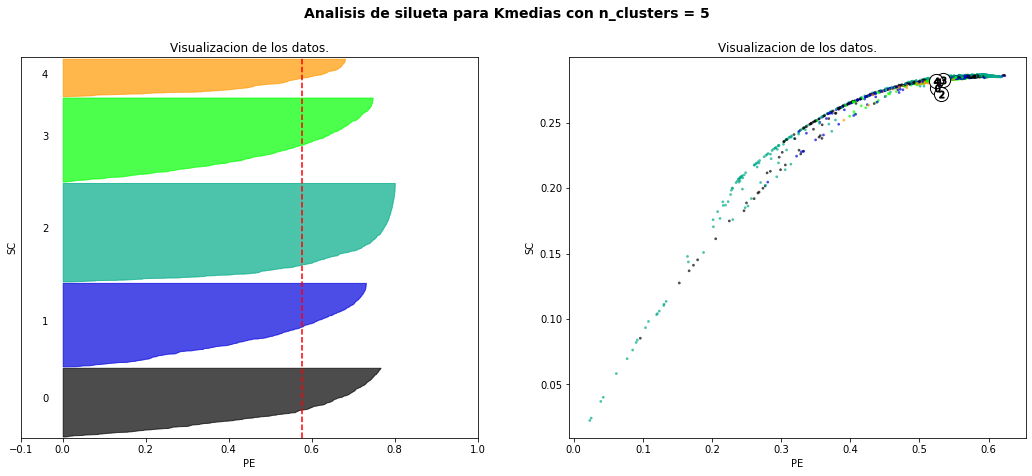

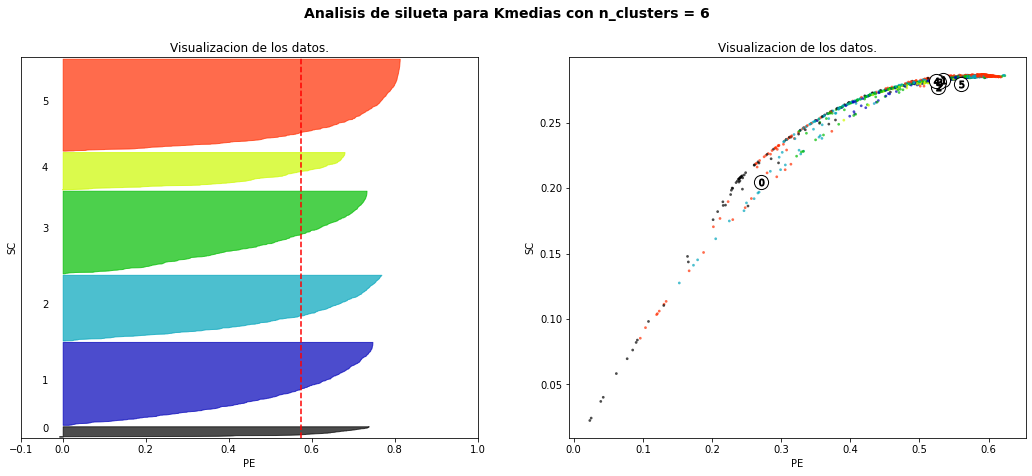

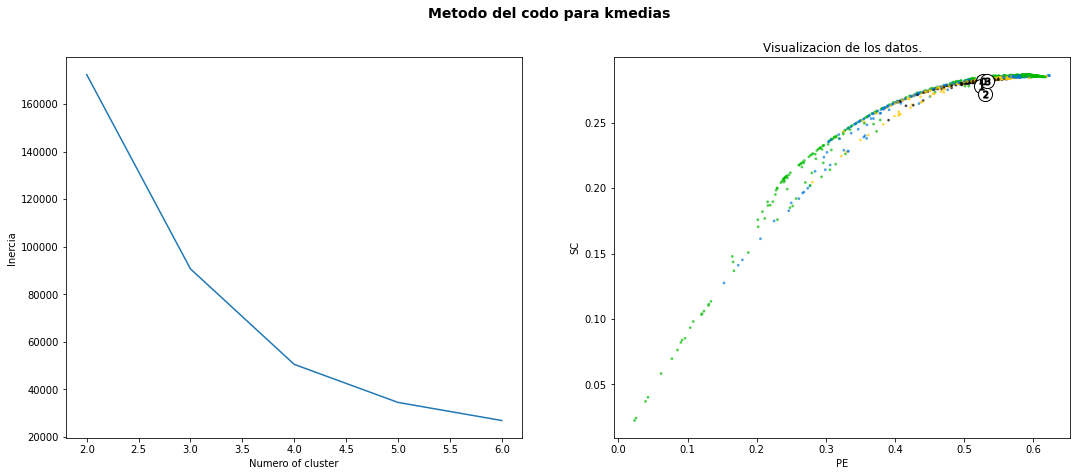

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=alldata_P1_sin_eti

range_n_clusters = [2, 3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("PE")
    ax1.set_ylabel("SC")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("PE")
    ax2.set_ylabel("SC")
    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("PE")
ax2.set_ylabel("SC")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

Intentamos obtener 2 clusters para el paciente 1 intentando identificar el estado 1 del estado 0 pero no sucedió. El método del codo sugirió utilizar 3 clusters. Sin embargo, el valor del coeficiente de silueta es bastante similar para todos los n analizados (2, 3, 4, 5 y 6).

Luego de haber analizado a todos los pacientes juntos y al paciente 1 por separado con Kmeans podemos concluir que este no es un algoritmo adecuado para el tipo de datos que tenemos ya que no solo pretende distribución normal de las variables sino también varianza semenjante, lo que no es característico de nuestro set de datos en particular. 


Por lo tanto, decidimos probar con DBSCAN trabajando solo con el paciente 1:

## DBSCAN para Paciente 1

Calculamos la distancia: 

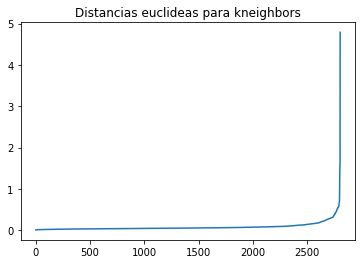

In [ ]:
from pandas.core.common import random_state
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2, metric= 'euclidean')
nbrs = neigh.fit(alldata_P1_sin_eti)
distances, indices = nbrs.kneighbors(alldata_P1_sin_eti)

# Clasificamos y representamos los resultados.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title("Distancias euclideas para kneighbors")
plt.plot(distances)

Se elige la distancia = 0.03

In [ ]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.03, min_samples=5).fit(alldata_P1_sin_eti)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{-1, 0, 1, 2, 3}

In [ ]:
from collections import Counter
Counter(clusters.labels_)

Counter({3: 5, -1: 2782, 0: 7, 2: 5, 1: 5})

Otra vez, podemos observar que más del 95% de los datos se encuentran clusterizados en el mismo grupo, por lo cual no estaría sirviendo para encontrar segmentaciones distintivas en un solo paciente. En este caso, la mayoría de los datos estan en el cluster -1, que significa que son outliers.

# Spectral Clustering para Paciente 1

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(alldata_P1_sin_eti)

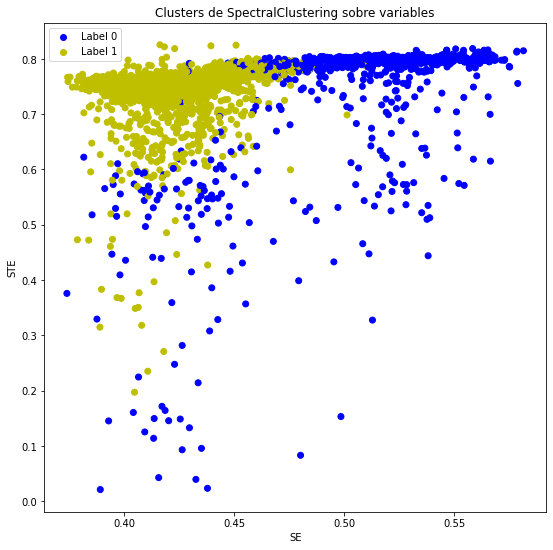

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
# b = plt.scatter(alldata_P1_sin_eti['SE'], alldata_P1_sin_eti['STE'], color ='b');
# y = plt.scatter(alldata_P1_sin_eti['SE'], alldata_P1_sin_eti['STE'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(alldata_P1_sin_eti['SE'], alldata_P1_sin_eti['STE'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.xlabel('SE') 
plt.ylabel('STE') 
plt.title("Clusters de SpectralClustering sobre variables")
plt.show()

In [ ]:
labels_rbf_df = pd.DataFrame(labels_rbf, columns=['labels'])
labels_rbf_df

labels
0          0
1          1
2          1
3          1
4          1
...      ...
2799       0
2800       1
2801       0
2802       0
2803       0

[2804 rows x 1 columns]

In [ ]:
P1_SpecClust_labels = [alldata_P1_sin_eti,labels_rbf_df]
P1_SpecClust_labels = pd.concat(P1_SpecClust_labels, axis=1)
# display(df_PCA_kmeans_P1)
# P1_SpecClust_labels.rename({0: 'SpecClustLabels'}, axis=1) #no puedo renombrar la columna :(
P1_SpecClust_labels


PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  labels  
0     4.426225e-06  15.557899 -0.000629       0  
1     2.075434e-05  48.467869 -0.031036       1  
2     5.322688e-06  46.771531 -0.077559       1  
3    -1.353617e-05  48.590217 -0.024175       1  
4    -5.555946e-07  41.749673 -0.087401       1  
...            ...        ...       ...     ...  
2799 -6.380187e-06  20.509189 -0.008385       0  
2800 -1.281961e-05  34.162332 -0.039207       1  
2801 -8.332419e-09   5.592382 -0.204169       0  
2802  2.273862e-06  22.671524  0.029680       0  
2803 -1.226151e-05  15.241925 -0.125999       0  

[2804 rows x 10 columns]

In [ ]:
P1_SpecClust_labels_etis = [P1_SpecClust_labels, alldata_P1[['State','Patient']]]
P1_SpecClust_labels_etis = pd.concat(P1_SpecClust_labels_etis, axis=1)
display(P1_SpecClust_labels_etis)

PE        SC       GNE        SE       LZC       STE  \
0     0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1     0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2     0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3     0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4     0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...        ...       ...       ...       ...       ...       ...   
2799  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
2800  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
2801  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
2802  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
2803  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  labels  State  Patient  
0     4.426225e-06  15.557899 -0.000629       0    1.0      1.0  
1     2.075434e-05  48.467869 -0.031036       1    0.0      1.0  
2     5.322688e-06  46.771531 -0.077559       1    0.0      1.0  
3    -1.353617e-05  48.590217 -0.024175       1    0.0      1.0  
4    -5.555946e-07  41.749673 -0.087401       1    0.0      1.0  
...            ...        ...       ...     ...    ...      ...  
2799 -6.380187e-06  20.509189 -0.008385       0    2.0      1.0  
2800 -1.281961e-05  34.162332 -0.039207       1    2.0      1.0  
2801 -8.332419e-09   5.592382 -0.204169       0    2.0      1.0  
2802  2.273862e-06  22.671524  0.029680       0    2.0      1.0  
2803 -1.226151e-05  15.241925 -0.125999       0    2.0      1.0  

[2804 rows x 12 columns]

In [ ]:
# Separamos los datos etiquetados por cluster
cluster_0 = P1_SpecClust_labels_etis[P1_SpecClust_labels_etis['labels'] == 0]
cluster_1 = P1_SpecClust_labels_etis[P1_SpecClust_labels_etis['labels'] == 1]

In [ ]:
cluster_0['State'].value_counts()

2.0    511
0.0    298
1.0     70
Name: State, dtype: int64

In [ ]:
cluster_1['State'].value_counts()

2.0    1025
0.0     829
1.0      71
Name: State, dtype: int64

Si bien SpectralClustering no dividió la data como esperábamos, a diferencia de los algoritmos utilizados anteriomente, el porcentaje de estado 0 en el cluster 0 es menor que en el cluster 1. De todas maneras, consideramos que la separacion fue ineficiente. 

### Clustering sobre PCA en Paciente 1



En las siguientes celdas de código, intentamos clusterizar utilizando los datos obtenidos por PCA y no las variables propias del dataset. Para ello,

##### Normalizamos los datos del P1 y calculamos PCA:

In [ ]:
alldata_P1_sin_eti_Norm = normalize(alldata_P1_sin_eti)

In [ ]:
pca = PCA(n_components = 2)
alldata_P1_sin_eti_PCA = pca.fit_transform(alldata_P1_sin_eti_Norm)
alldata_P1_sin_eti_PCA = pd.DataFrame(alldata_P1_sin_eti_Norm)
alldata_P1_sin_eti_PCA.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
  
alldata_P1_sin_eti_PCA.head()

PC1       PC2       PC3       PC4       PC5       PC6           PC7  \
0  0.038304  0.018272  0.042391  0.033353  0.020833  0.051357  2.833910e-07   
1  0.011171  0.005841  0.011758  0.008520  0.004029  0.015529  4.280737e-07   
2  0.011612  0.006055  0.012244  0.008934  0.004274  0.016123  1.137631e-07   
3  0.011027  0.005817  0.011535  0.008049  0.003422  0.015386 -2.784942e-07   
4  0.010463  0.006520  0.009551  0.009885  0.002779  0.015999 -1.330371e-08   

        PC8       PC9  
0  0.996101 -0.000040  
1  0.999686 -0.000640  
2  0.999659 -0.001658  
3  0.999699 -0.000497  
4  0.999695 -0.002093

In [ ]:
alldata_P1_sin_eti_PCA_2 = alldata_P1_sin_eti_PCA.drop(columns=['PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
alldata_P1_sin_eti_PCA_2

PC1       PC2
0     0.038304  0.018272
1     0.011171  0.005841
2     0.011612  0.006055
3     0.011027  0.005817
4     0.010463  0.006520
...        ...       ...
2799  0.026392  0.013876
2800  0.016889  0.008334
2801  0.040227  0.034577
2802  0.025748  0.012570
2803  0.037577  0.018695

[2804 rows x 2 columns]

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 2 componentes principales.
pca.explained_variance_ratio_.sum()*100

87.33122489040576

Debido a que PC1 y PC2 explican el 87% de la varianza de los datos, se decide usar estas dos variables para clusterizar. Se elegió SpectralClustering con affinity=rbf

#### Aplicamos SpectralClustering sobre las dos primeras columnas del PCA: PC1 y PC2

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(alldata_P1_sin_eti_PCA_2)

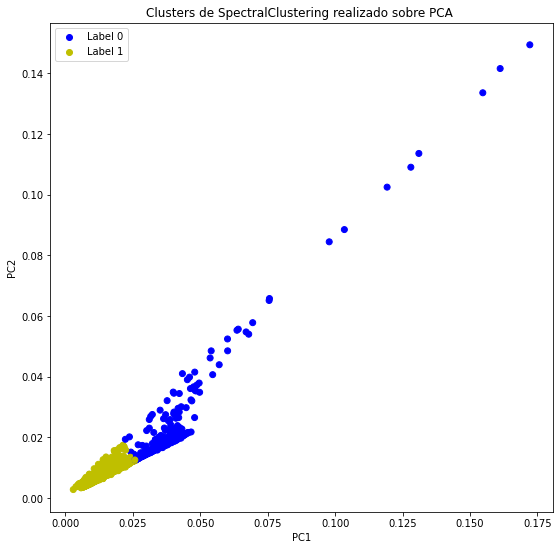

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
# b = plt.scatter(alldata_P1_sin_eti_PCA_2['PC1'], alldata_P1_sin_eti_PCA_2['PC2'], color ='b');
# y = plt.scatter(alldata_P1_sin_eti_PCA_2['PC1'], alldata_P1_sin_eti_PCA_2['PC2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(alldata_P1_sin_eti_PCA_2['PC1'], alldata_P1_sin_eti_PCA_2['PC2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.title("Clusters de SpectralClustering realizado sobre PCA ")
plt.show()

Se obtuvieron 2 clusters, como era de esperarse, ya que se seleccionó un n=2. La desventaja de aplicar métodos de clustering sobre datos de PCA es que no se pueden evaluar los clústeres con las etiquetas ya que al reducir dimensiones, estos datos se pierden. A simple vista, pareciera que este método de clusterización separa los datos linealmente, como veníamos viendo anteriormente con otros algoritmos también. 


# CONCLUSION

Luego de haber explorado diferentes herramientas, no logramos segregar nuestro set de datos como esperábamos en un principio. Es decir, no pudimos separar el estado 0 del estado 1 ni tampoco predecir el estado 1 con alta eficacia.

Creemos que esto puede estar dado debido a la alta complejidad del problema. La distinción entre ambos estados se estudia desde hace más de 30 años y existen pocas herramientas que logran esta discriminacion exitosamente. Este problema se da principalmente porque ambos estados son muy semejantes en términos de actividad eléctrica neuronal.
Proponemos como una alternativa a futuro, trabajar con los datos crudos ya que nosotros trabajamos con un set de datos procesados, el cual incluía mediciones realizadas sobre 16 canales promediados en un único dato.
Creemos que, quizás, el uso del set de datos procesados resulto en una perdida de información valiosa para la distinción entre ambos estados, aunque la única forma de confirmar esta hipótesis sería trabajando con los datos crudos.

Es por ello que; si bien no conseguimos predecir el estado preictal en estos 3 pacientes, no descartamos la idea de poder lograrlos partiendo de los datos crudos.